# Modelo - Série temporal clima

Modelo de série temporal - Clima previsão da temperatura  

Base dados - [Dataset](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

# Importação das bibliotecas

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [3]:
# Importação das bibliotecas 

# Pandas carregamento csv
import pandas as pd 

# Numpy para carregamento cálculos em arrays multidimensionais
import numpy as np 

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

matplotlib: 3.4.3
pandas    : 1.3.4
plotly    : 5.5.0
watermark : 2.3.0
numpy     : 1.20.3
seaborn   : 0.11.2



In [5]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

# Base de dados

In [6]:
ds = pd.read_csv('Bases de dados\DailyDelhiClimateTrain.csv')
ds

date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]

# Descrição dados

- Verificação de linhas colunas informaçãos dos dados e tipos de variáveis. Valores das colunas verficando dados nulos ou vazios.

In [7]:
# Exibido 5 primeiros dados

ds.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [8]:
# Exibido 5 últimos dados 

ds.tail()

date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

In [9]:
# Número de linhas e colunas

ds.shape

(1462, 5)

In [10]:
# Verificando informações das variaveis

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [11]:
# Exibido tipos de dados

ds.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(ds.shape[0]))
print("Números de colunas: {}" .format(ds.shape[1]))

Números de linhas: 1462
Números de colunas: 5


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", ds.isnull().sum().values.sum())
print("\nUnique values :  \n",ds.nunique())


Missing values :   0

Unique values :  
 date            1462
meantemp         617
humidity         897
wind_speed       730
meanpressure     626
dtype: int64


In [14]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

ds.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [15]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

ds.notnull().sum()

date            1462
meantemp        1462
humidity        1462
wind_speed      1462
meanpressure    1462
dtype: int64

In [16]:
# Total de número duplicados

ds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1457    False
1458    False
1459    False
1460    False
1461    False
Length: 1462, dtype: bool

# Estatística descritiva

In [17]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

ds.describe().T

count         mean         std        min          25%          50%          75%          max
meantemp      1462.0    25.495521    7.348103   6.000000    18.857143    27.714286    31.305804    38.714286
humidity      1462.0    60.771702   16.769652  13.428571    50.375000    62.625000    72.218750   100.000000
wind_speed    1462.0     6.802209    4.561602   0.000000     3.475000     6.221667     9.238235    42.220000
meanpressure  1462.0  1011.104548  180.231668  -3.041667  1001.580357  1008.563492  1014.944901  7679.333333

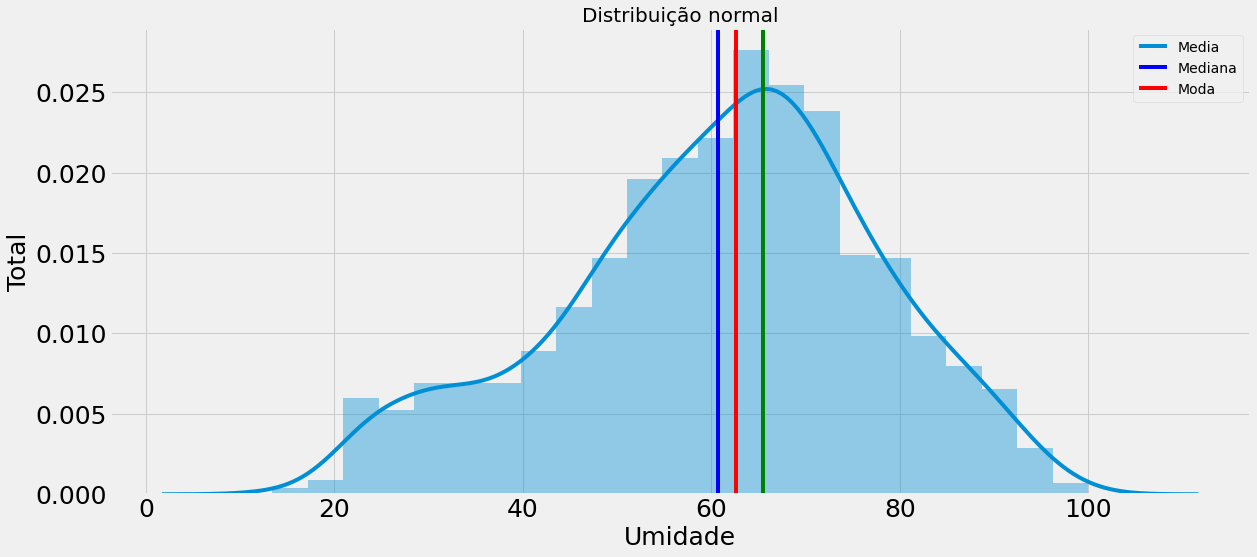

In [19]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(ds['humidity']);
plt.title("Distribuição normal", fontsize=20)
plt.xlabel("Umidade")
plt.ylabel("Total")
plt.axvline(ds['humidity'].mean(), color='b')
plt.axvline(ds['humidity'].median(), color='r')
plt.axvline(ds['humidity'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

In [20]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.
ds.corr()

meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.571951    0.306468     -0.038818
humidity     -0.571951  1.000000   -0.373972      0.001734
wind_speed    0.306468 -0.373972    1.000000     -0.020670
meanpressure -0.038818  0.001734   -0.020670      1.000000

Text(0.5, 1.0, 'Matriz de correlação')

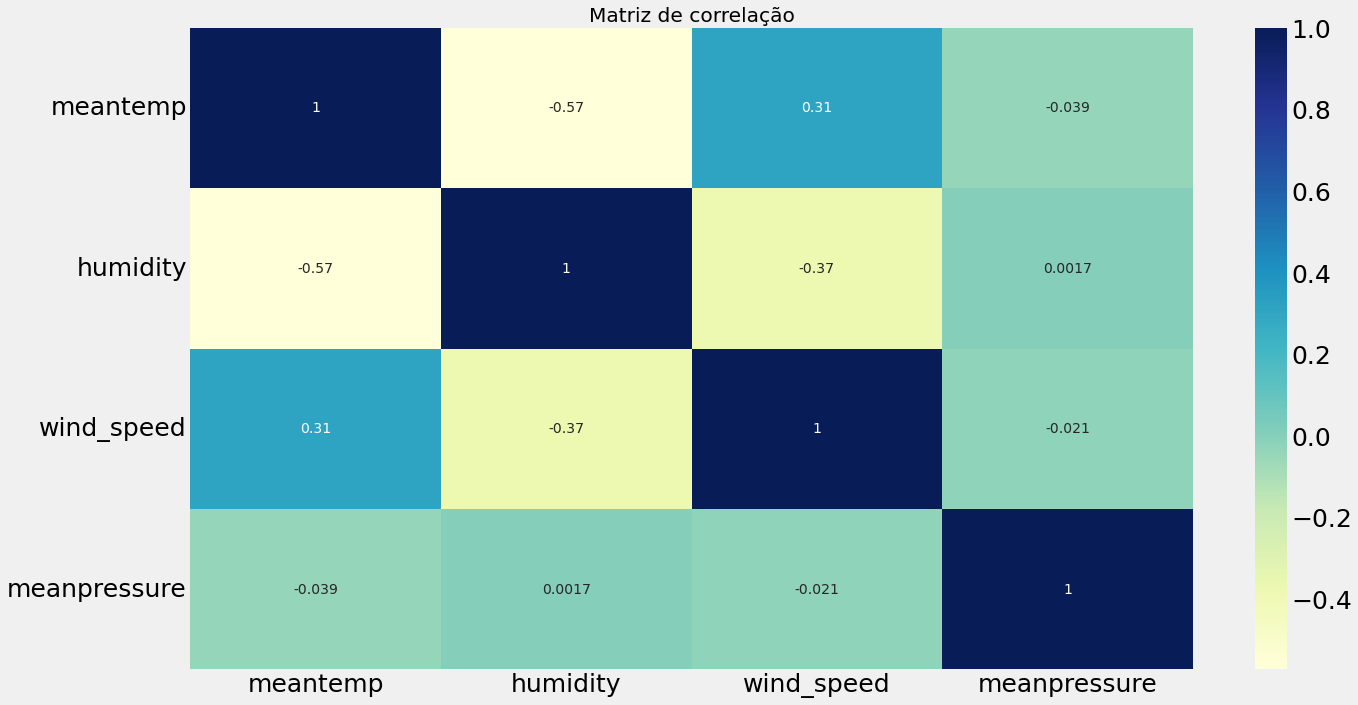

In [22]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20,11))
ax = sns.heatmap(ds.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

In [34]:
# Matriz de correlação interativa 
fig = px.imshow(ds.iloc[:, 1:].corr())
fig.show()

# Análise dados

In [27]:
# Cálculo da média movel

media_humidity = ds[['date', 'humidity']].groupby('date').mean()
media_wind_speed = ds[["date", "wind_speed"]].groupby('date').mean()

print("Média de média Humidity", media_humidity)
print()
print("Média de média media wind speed", media_wind_speed)

Média de média Humidity               humidity
date                  
2013-01-01   84.500000
2013-01-02   92.000000
2013-01-03   87.000000
2013-01-04   71.333333
2013-01-05   86.833333
...                ...
2016-12-28   68.043478
2016-12-29   87.857143
2016-12-30   89.666667
2016-12-31   87.000000
2017-01-01  100.000000

[1462 rows x 1 columns]

Média de média media wind speed             wind_speed
date                  
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
...                ...
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000

[1462 rows x 1 columns]


[Text(0.5, 1.0, 'Média móvel - Wind speed'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Wind speed')]

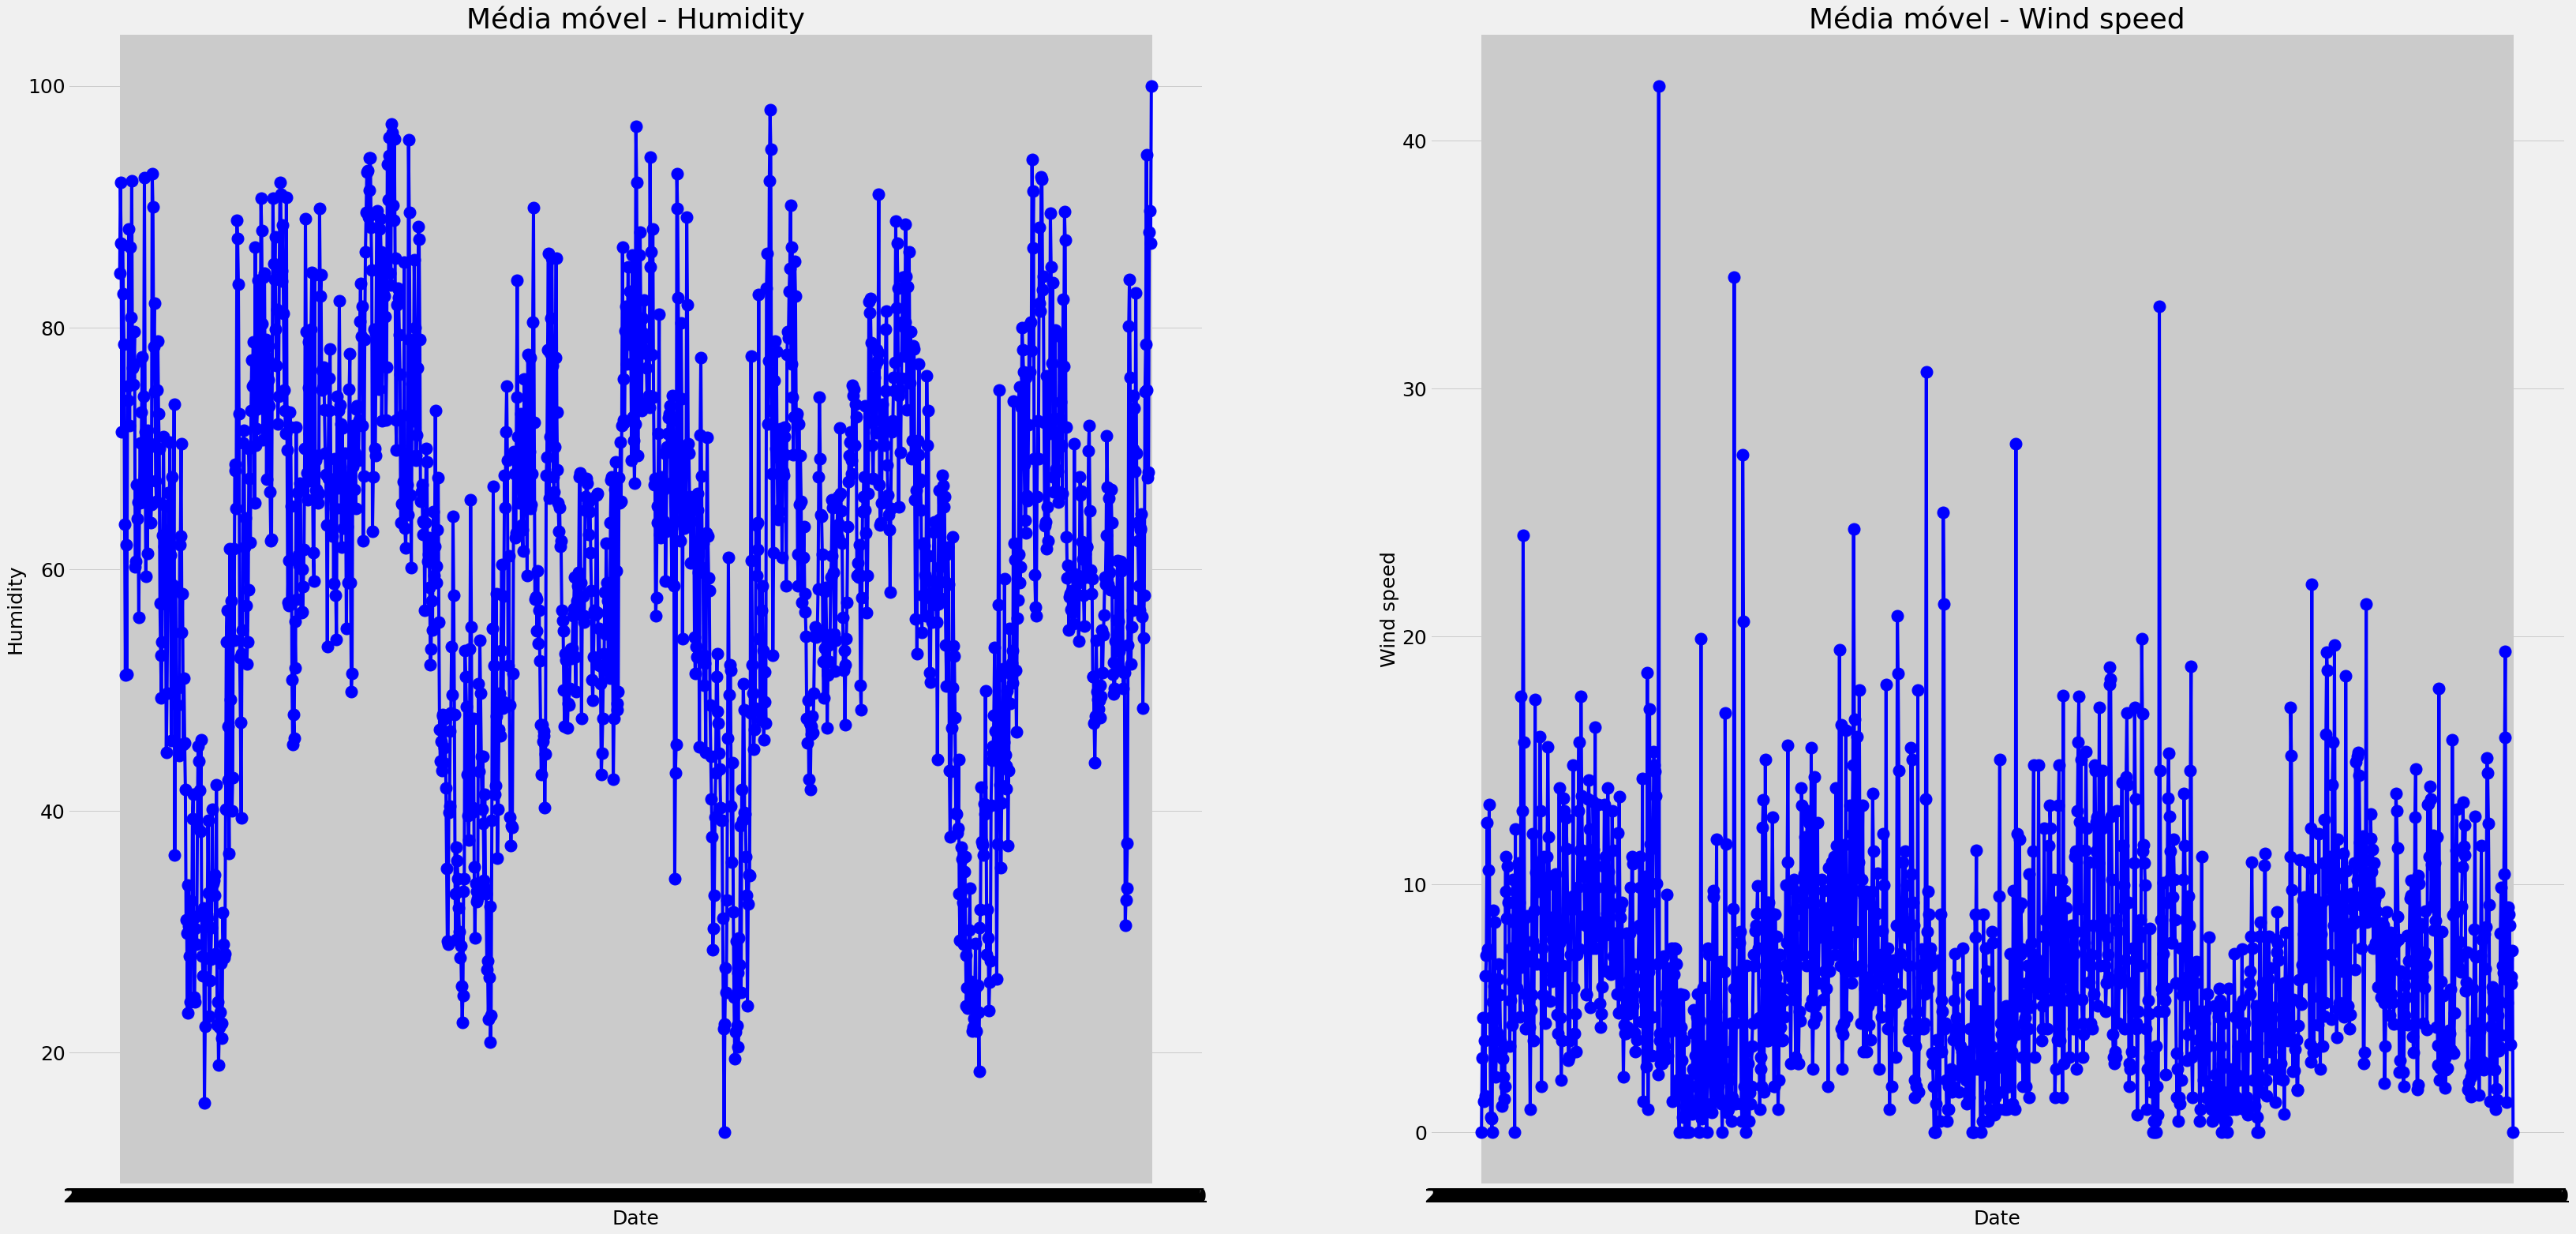

In [29]:
# Gráfico média movel - Humidity e Wind speed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50.5, 25));
plt.rcParams['font.size'] = '25'

ax1.plot(media_humidity, marker='o', color = 'blue', markersize = 15);
ax1.set(title="Média móvel - Humidity", xlabel = "Date", ylabel = "Humidity")

ax2.plot(media_wind_speed, marker='o', color = 'blue', markersize = 15);
ax2.set(title="Média móvel - Wind speed", xlabel="Date", ylabel="Wind speed")

In [30]:
# Gráfico da temperatura
fig = px.line(ds, x="date", y="meantemp", title="Temperatura")
fig.show()

In [31]:
# Gráfico umidade
fig = px.line(ds, x="date", y="humidity", title="Umidade")
fig.show()

In [32]:
# Gráfico velocidade do vento
fig = px.line(ds, x="date", y="wind_speed", title="Velocidade do vento")
fig.show()

Text(0, 0.5, 'Total')

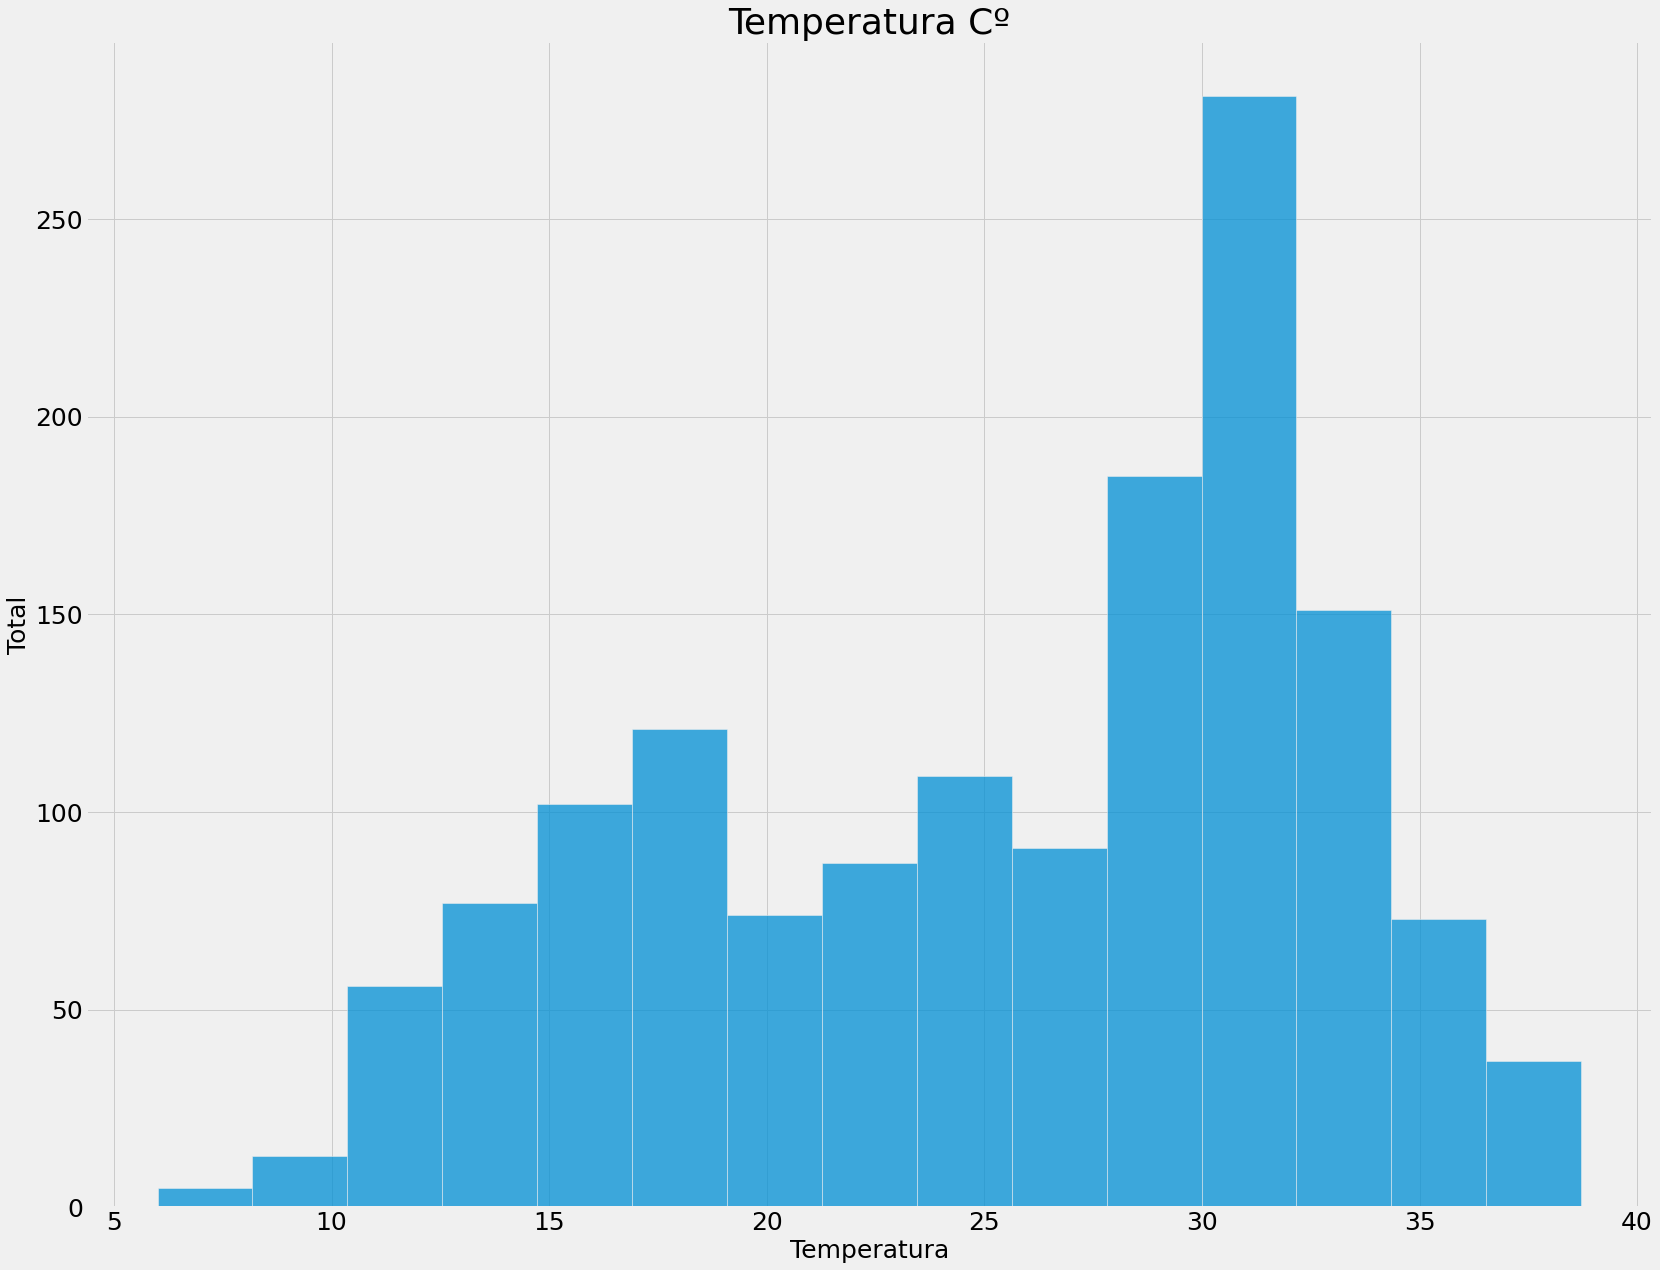

In [36]:
# Observando total de Temperatura

sns.histplot(ds["meantemp"])
plt.title("Temperatura Cº")
plt.xlabel("Temperatura")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

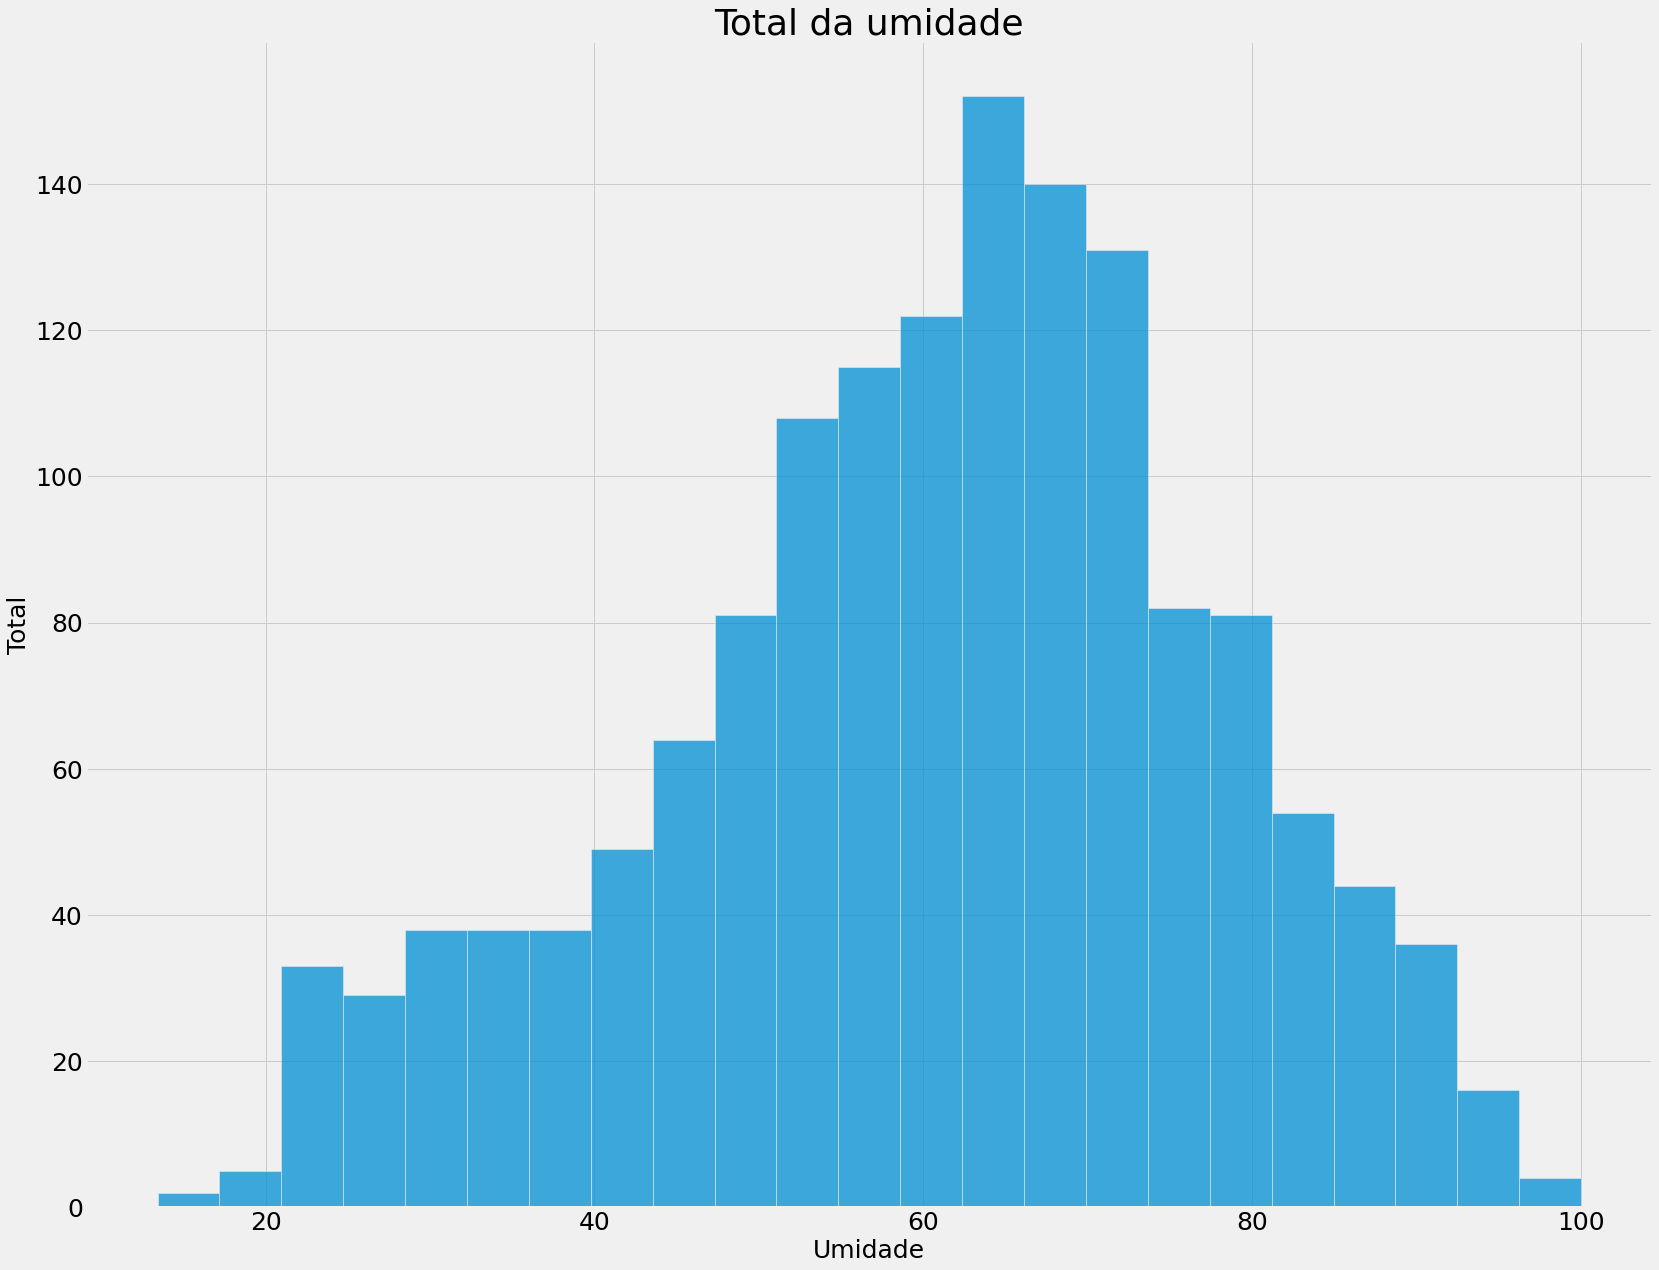

In [40]:
# Observando total de umidade

sns.histplot(ds["humidity"])
plt.title("Total da umidade")
plt.xlabel("Umidade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

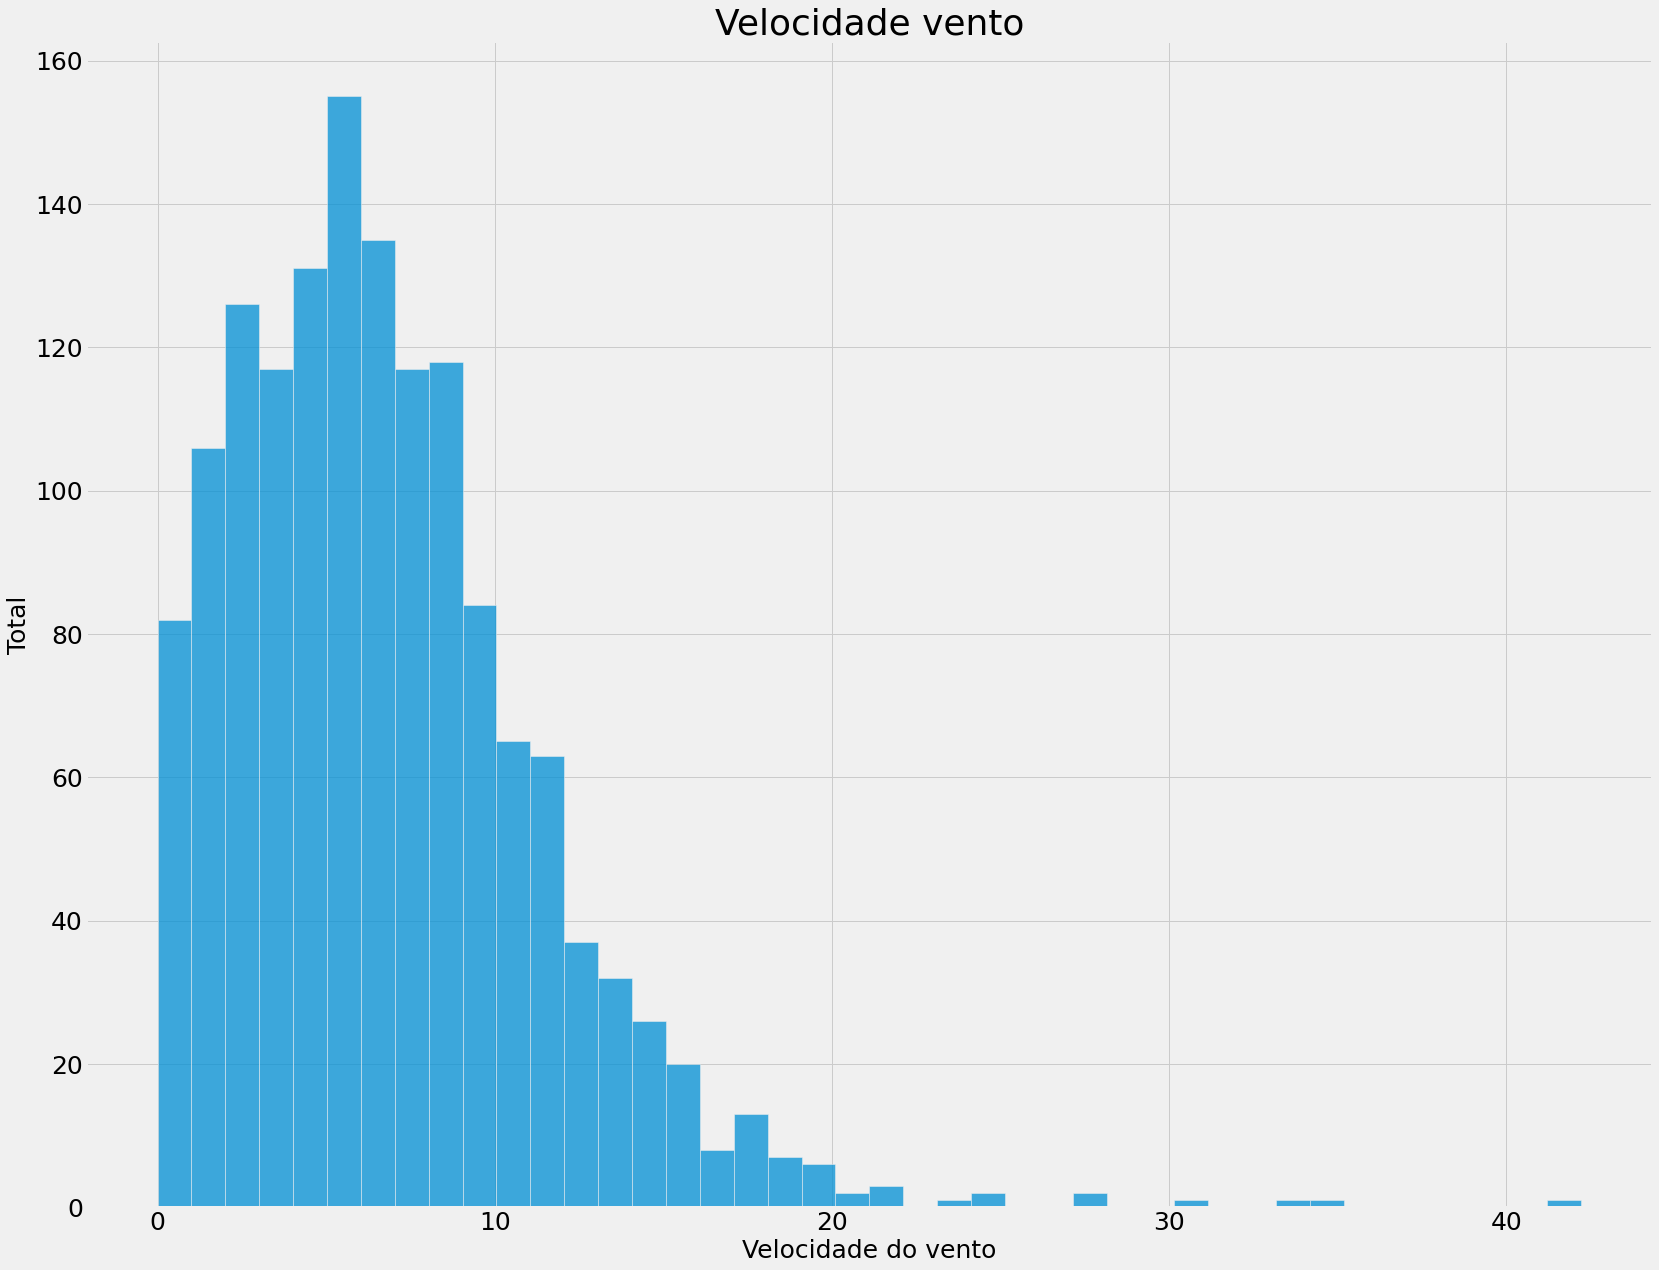

In [42]:
sns.histplot(ds["wind_speed"])
plt.title("Velocidade vento")
plt.xlabel("Velocidade do vento")
plt.ylabel("Total")

# Análise de dados = Univariada

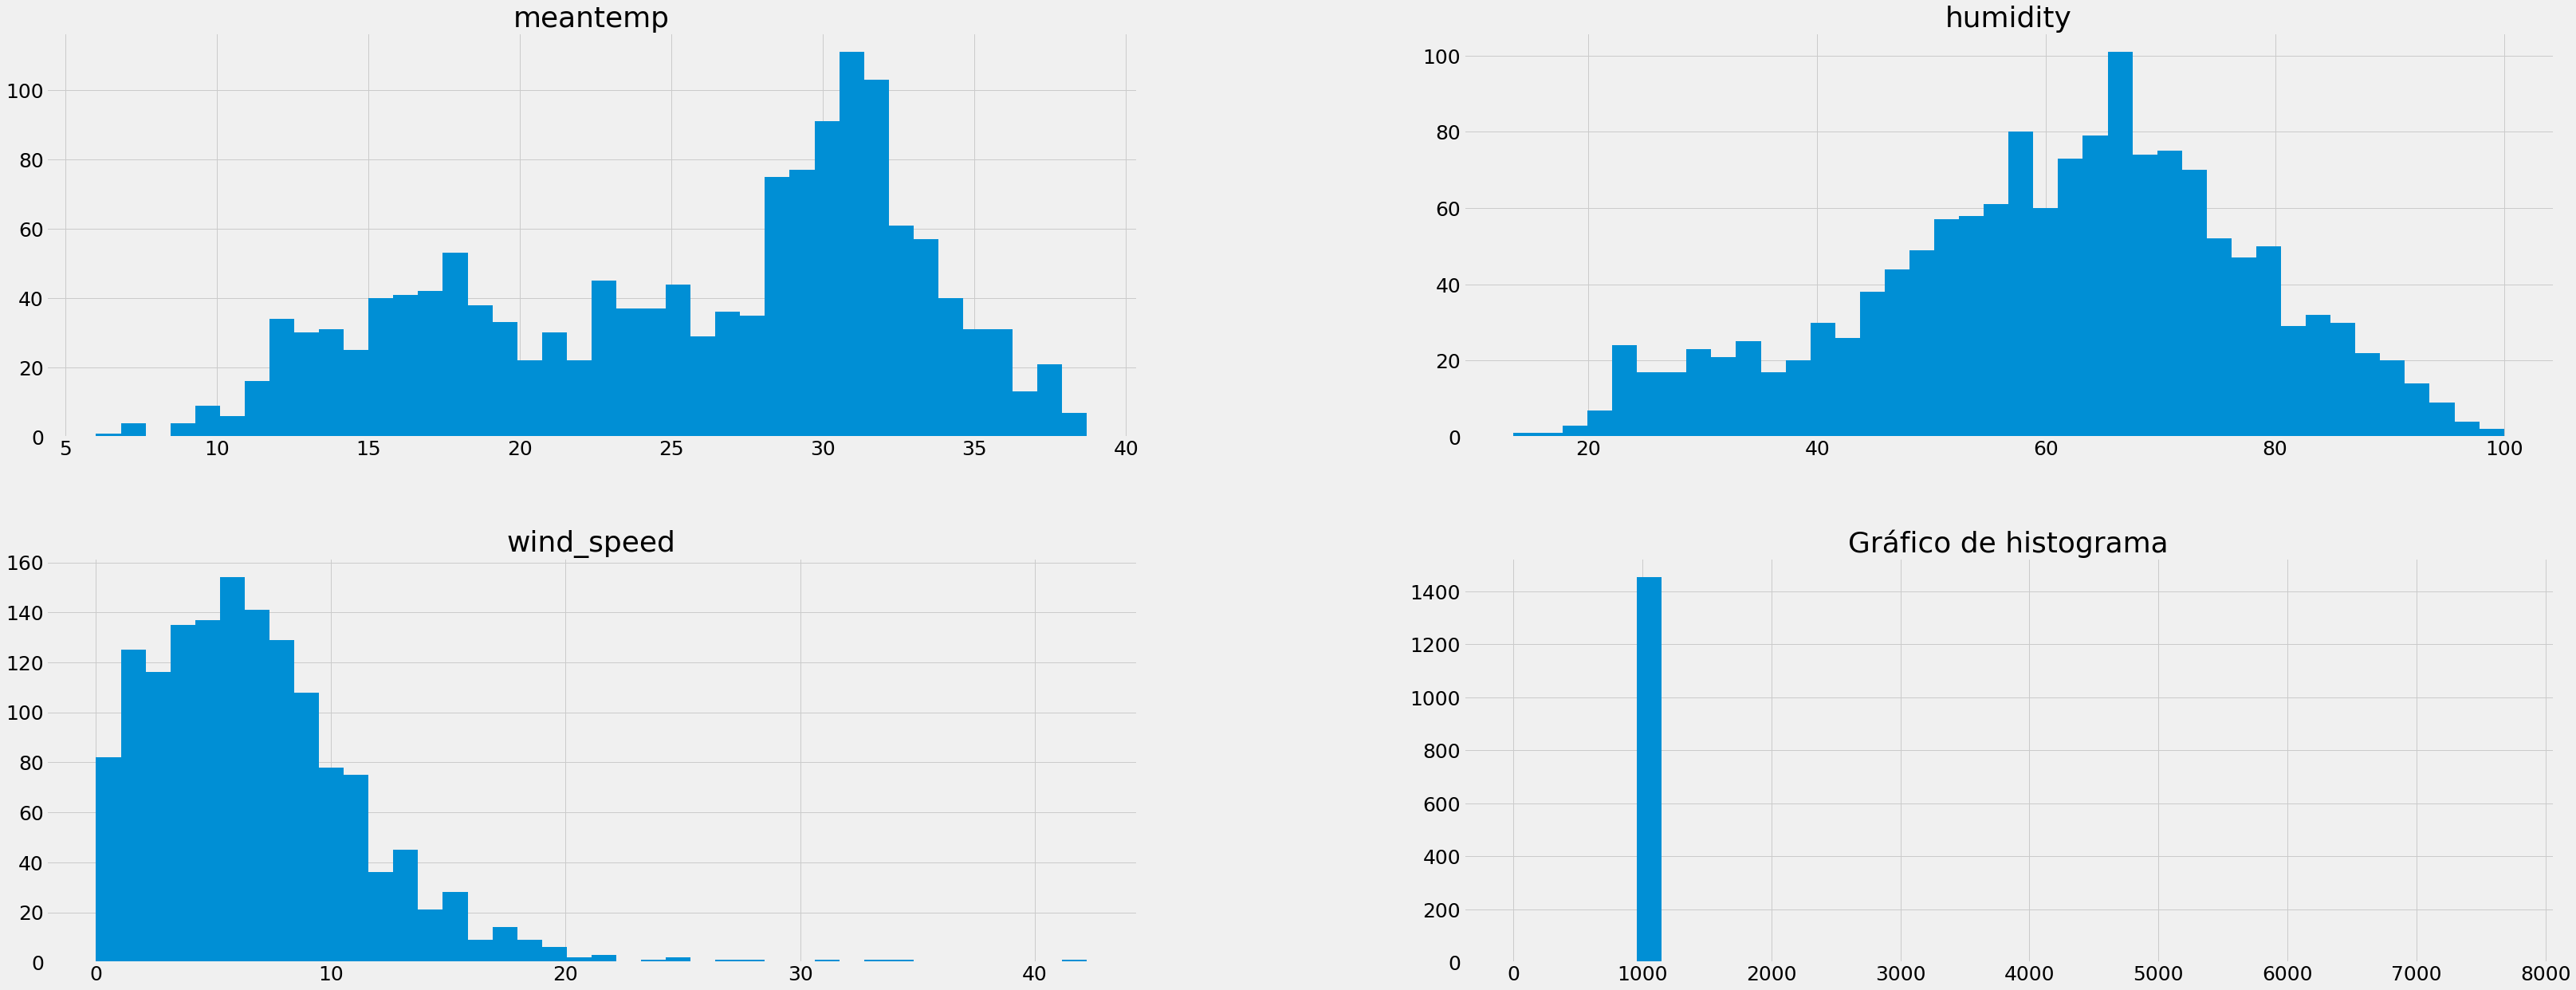

In [43]:
# Fazendo um comparativo dos dados 

ds.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gráfico de histograma")
plt.show()

# Dataset - Climate

In [46]:
data = pd.read_csv('Bases de dados\DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
data

meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [48]:
data.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

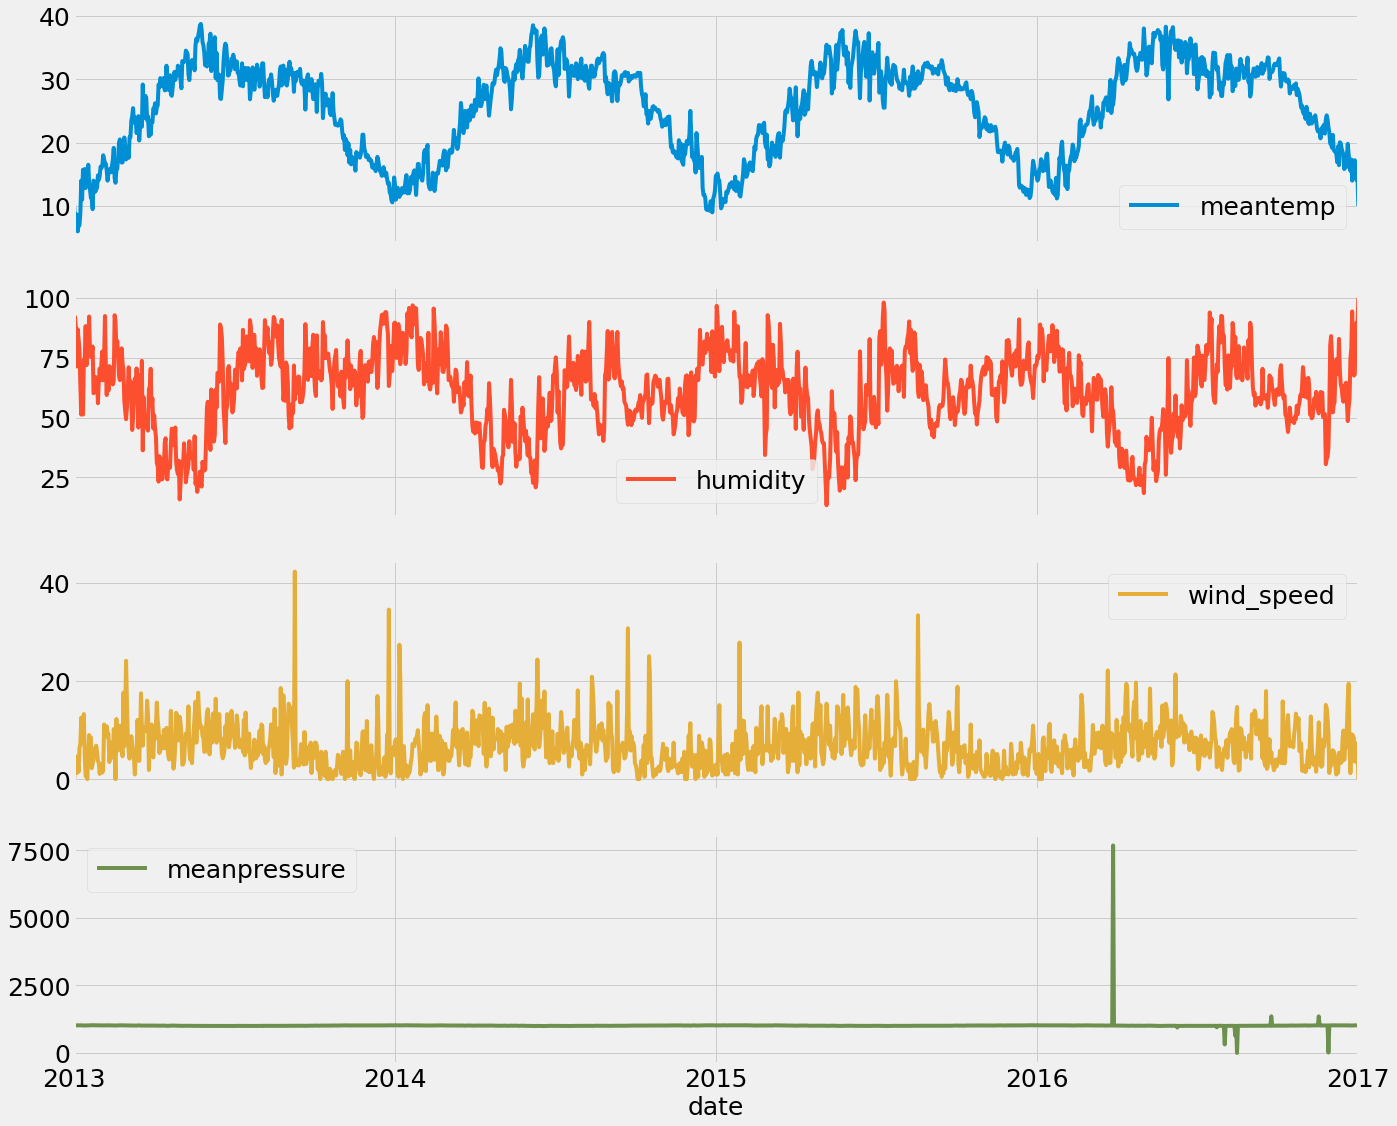

In [50]:
# Plot total
data.plot(subplots=True, figsize=(20.5, 18))
plt.show()

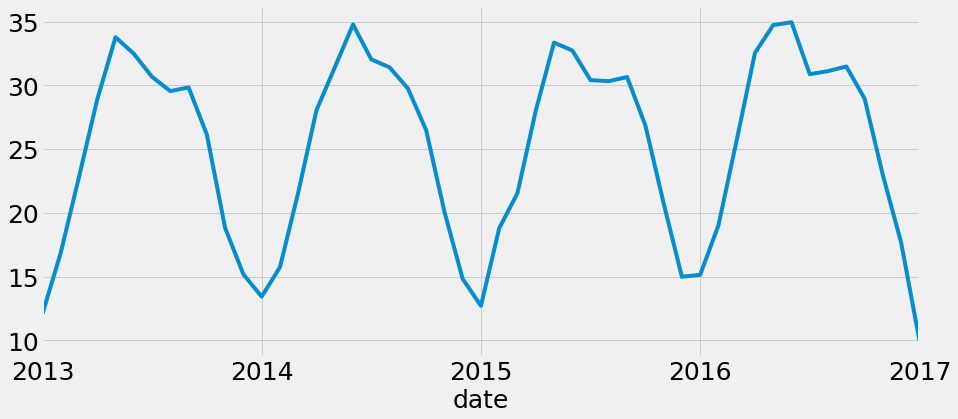

In [52]:
# Média dos dados
df = data['meantemp'].resample('MS').mean()

# Gráfico da média - Tempo médio
df.plot(figsize=(14,6))
plt.show()

# Decomposição Sazonal

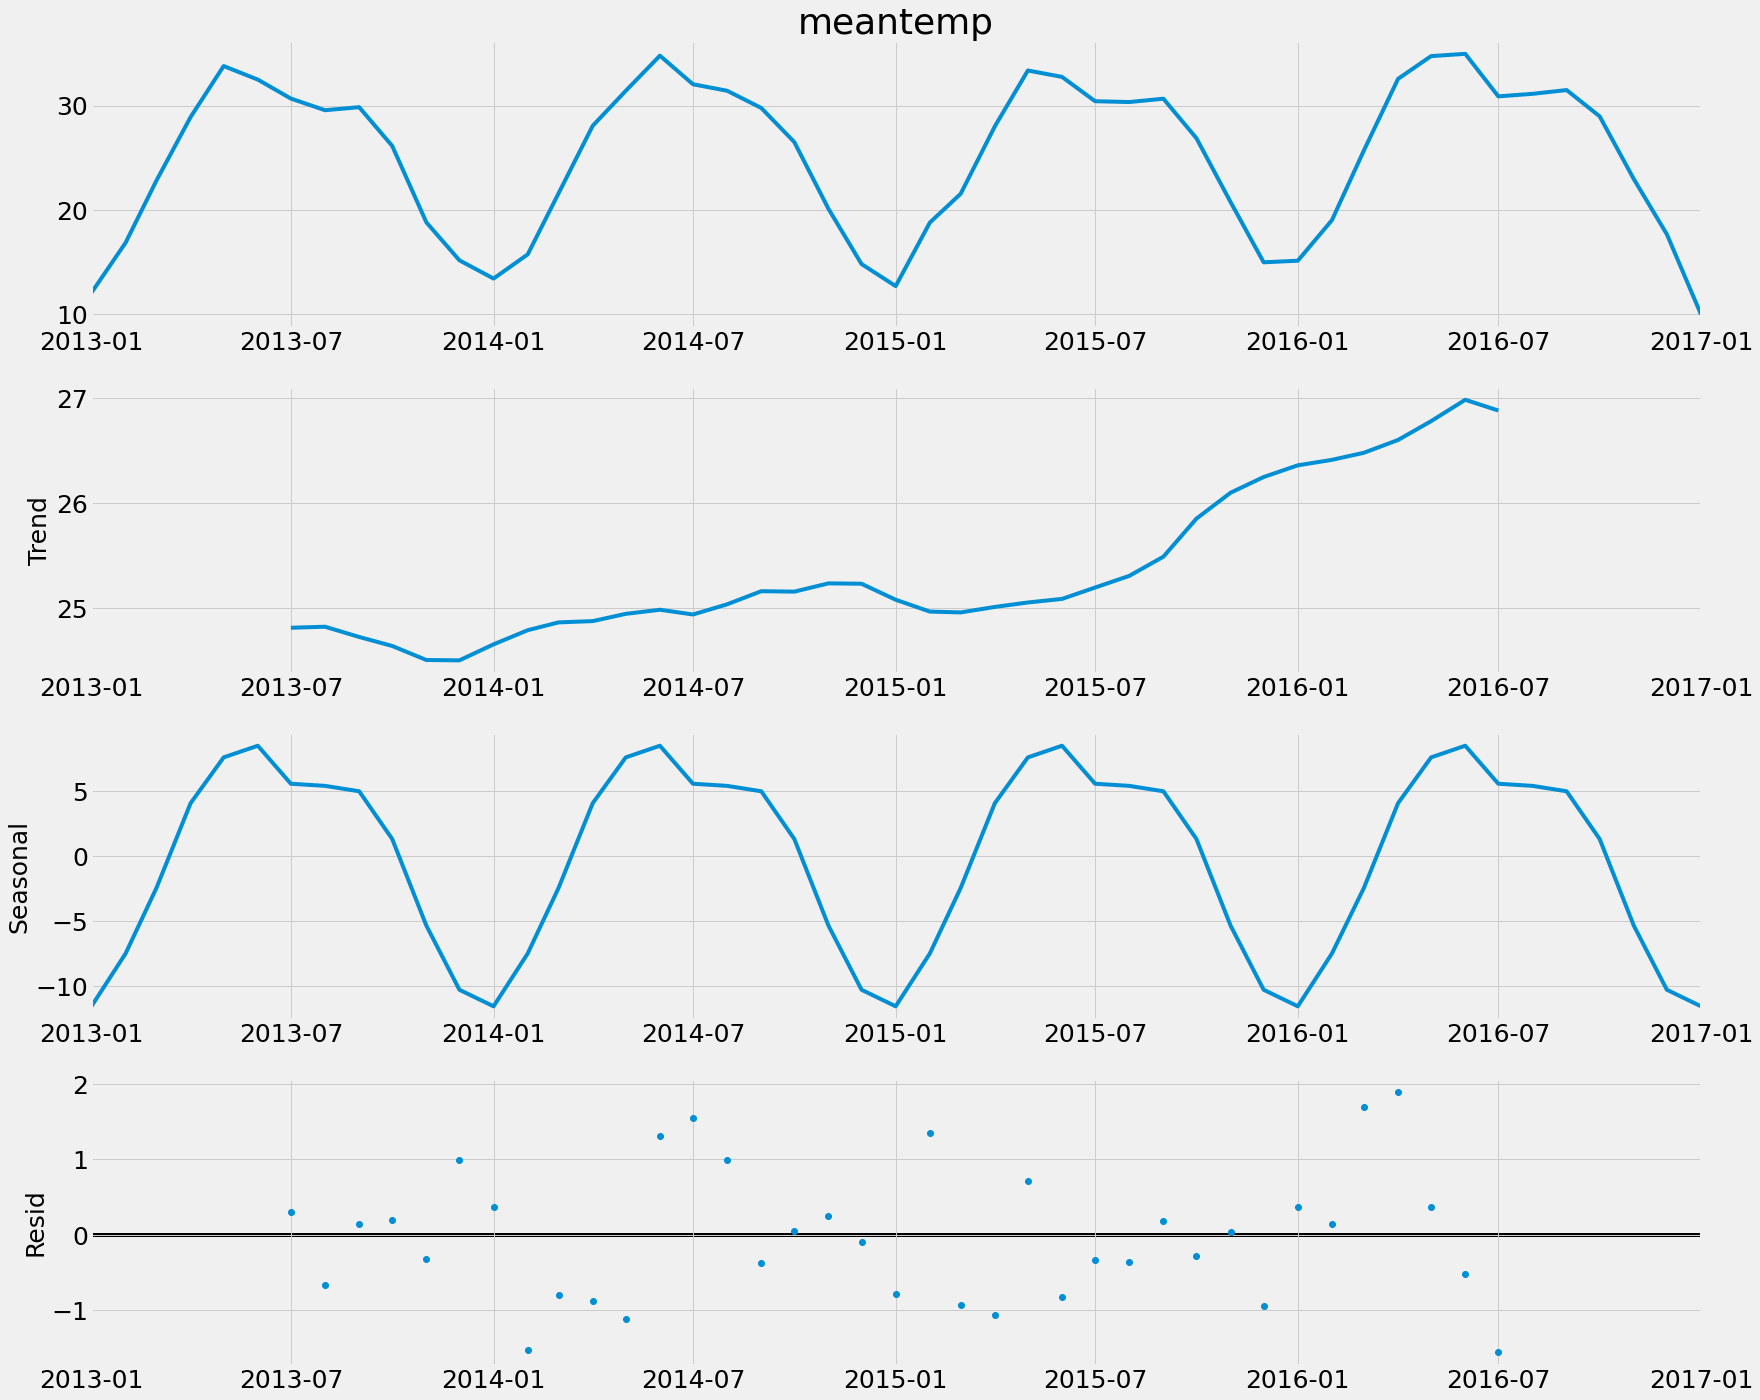

In [53]:
# Importação da biblioteca decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva
sd = seasonal_decompose(df, freq = 12)
sd.plot()
plt.show()

<AxesSubplot:xlabel='date'>

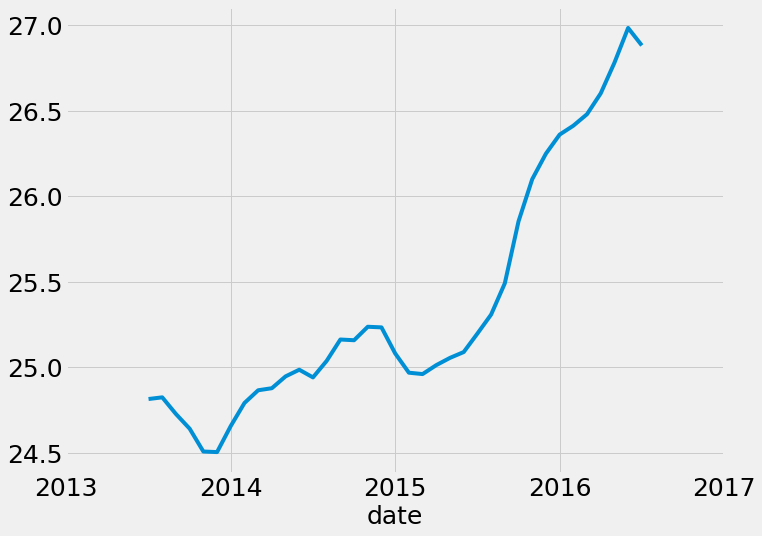

In [54]:
# Padrão de tendência extraído
dt = sd.trend

dt.plot(figsize=(10.5, 8))

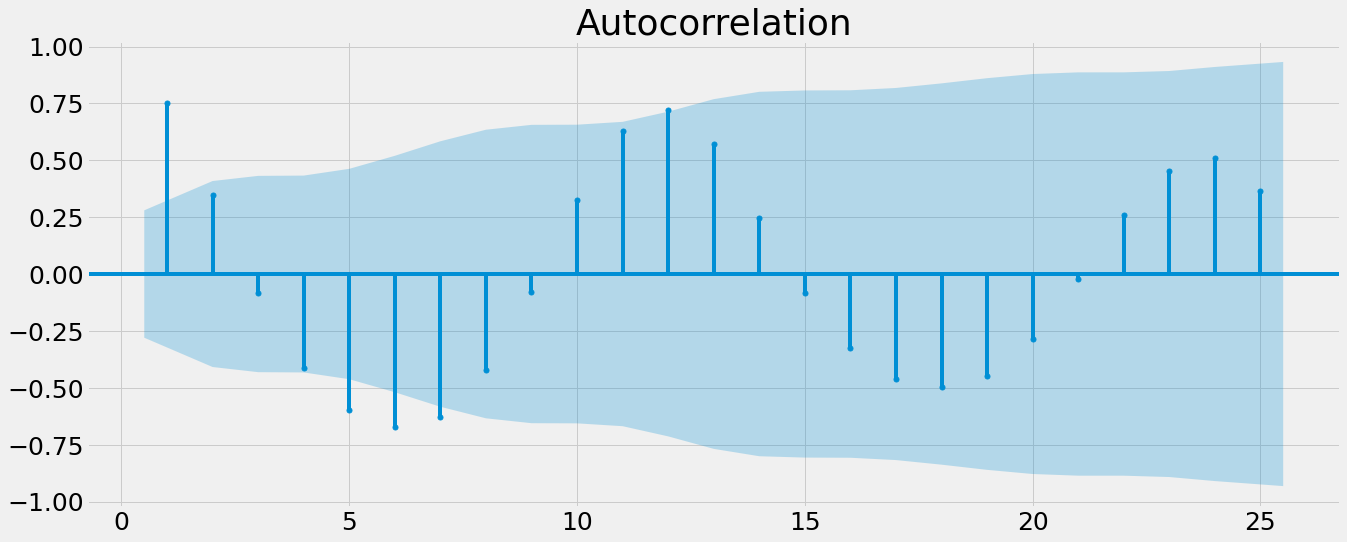

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(df, lags=25, zero=False, ax=ax)
plt.show()

Para evitar a tendência da série temporal, você precisa subtraí-la da média móvel do período de mais do que o período de sazonalidade.

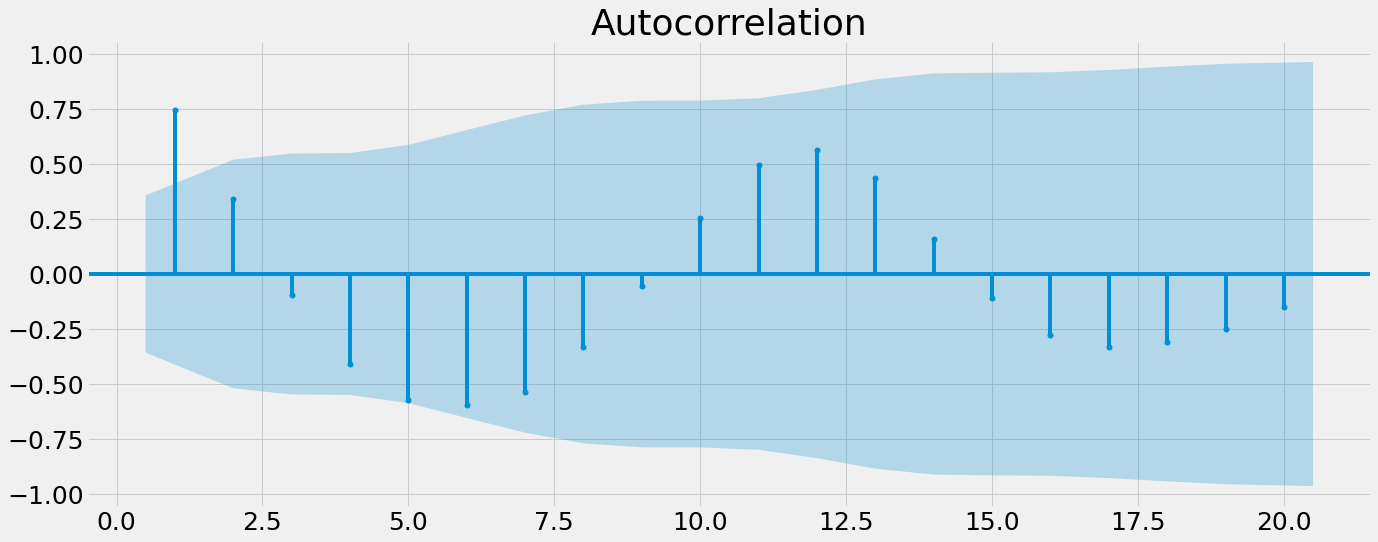

In [58]:
# Média movel
media_movel = df - df.rolling(20).mean()
media_movel = media_movel.dropna()

# Gráfico - Autocorrelation
fig, ax1 = plt.subplots(figsize=(20.5, 8))
plot_acf(media_movel, lags = 20, zero = False, ax = ax1)
plt.show()

- O ACF mostra que existe um componente sazonal e, portanto, incluí-lo melhorará suas previsões. Assim, podemos ajustar nossas séries temporais ao modelo sazonal ARIMA

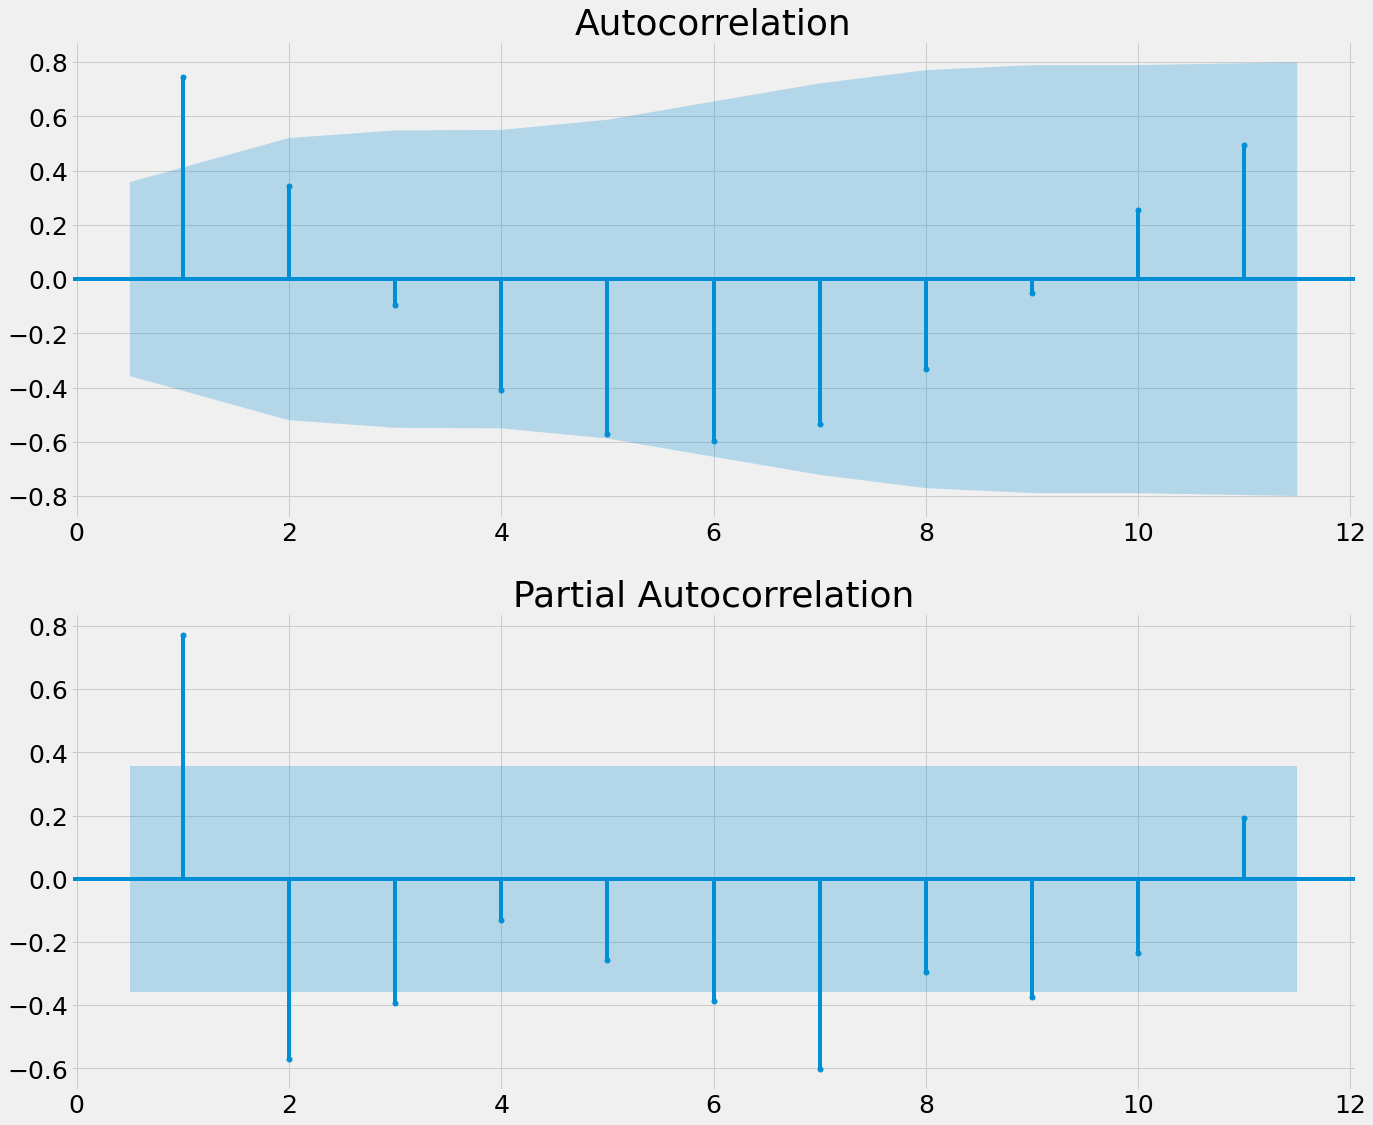

In [61]:
# SARIMA

# Gráfico 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20.5, 18))
plot_acf(media_movel, lags=11, zero=False, ax=ax1)

# Gráfico PACF
plot_pacf(media_movel, lags=11, zero=False, ax=ax2)
plt.show()

In [62]:
# ACF corta no lag 1. então, temos que usar o modelo MA.

media_movel = media_movel.diff(1).diff(12).dropna()
media_movel

date
2015-09-01    1.992157
2015-10-01   -0.593307
2015-11-01    0.187792
2015-12-01   -0.534236
2016-01-01    2.024835
2016-02-01   -2.093828
2016-03-01    3.779907
2016-04-01    0.259646
2016-05-01   -3.243576
2016-06-01    0.741046
2016-07-01   -1.701781
2016-08-01    0.262474
2016-09-01   -0.033674
2016-10-01    1.314113
2016-11-01   -0.005697
2016-12-01    0.342807
2017-01-01   -7.467977
Freq: MS, Name: meantemp, dtype: float64

# Modelo - ARIMA

O ACF não sazonal não mostra nenhum dos padrões usuais dos modelos MA, AR ou ARMA, então não escolhemos nenhum deles. O Seaosnal ACF e PACF parecem um modelo MA(1). Selecionamos o modelo que combina ambos.

In [63]:
# Modelo ARIMA
from pmdarima.arima import auto_arima

modelo_arima_auto = auto_arima(df,easonal = True, 
                               m = 25, d = 0, D = 1, max_p = 2, max_q = 2,
                               trace = True, error_action ='ignore',
                               suppress_warnings = True)



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[25] intercept   : AIC=131.185, Time=4.77 sec
 ARIMA(0,0,0)(0,1,0)[25] intercept   : AIC=145.396, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[25] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,1)(0,1,1)[25] intercept   : AIC=134.800, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[25]             : AIC=144.775, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[25] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(2,0,2)(1,1,0)[25] intercept   : AIC=128.722, Time=2.00 sec
 ARIMA(2,0,2)(0,1,0)[25] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,0,2)(2,1,0)[25] intercept   : AIC=130.727, Time=4.95 sec
 ARIMA(2,0,2)(2,1,1)[25] intercept   : AIC=131.008, Time=6.52 sec
 ARIMA(1,0,2)(1,1,0)[25] intercept   : AIC=126.258, Time=2.66 sec
 ARIMA(1,0,2)(0,1,0)[25] intercept   : AIC=126.831, Time=0.19 sec
 ARIMA(1,0,2)(2,1,0)[25] intercept   : AIC=128.261, Time=7.03 sec
 ARIMA(1,0,2)(1,1,1)[25] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(1,0,2)(0,1,1)[25] intercept   : AIC=inf, T

- Modelo menor AIC e um pouco diferente anterior a componente sazonal Deltra e 1 ao invés 2

In [64]:
# Modelo - Auto ARIMA
modelo_arima_auto

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 25),
      suppress_warnings=True, with_intercept=False)

In [65]:
# Modelo aic - Maior que anterior modelo
modelo_arima_auto.aic()

123.48541118538779

In [66]:
# Súmario do modelo
print(modelo_arima_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   49
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 25)   Log Likelihood                 -57.743
Date:                             Sun, 30 Jan 2022   AIC                            123.485
Time:                                     02:46:29   BIC                            128.198
Sample:                                          0   HQIC                           124.736
                                              - 49                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.1535      0.211      5.462      0.000       0.740       1.567
ma.L2          0.6890      

In [118]:
# Previsão do modelo ARIMA
modelo_arima_auto_pred_1 = modelo_arima_auto.predict(n_periods=100)
modelo_arima_auto_pred_1

array([14.01945478, 15.7110266 , 21.59341543, 28.05845295, 31.40566665,
       34.770978  , 32.03430715, 31.4121063 , 29.76262822, 26.49665481,
       20.1042519 , 15.17370887, 13.47411358, 19.48240599, 22.02927312,
       28.53674976, 33.81107326, 32.63058964, 30.19648444, 30.29655316,
       30.76338721, 26.55912631, 20.20123318, 14.59645074, 15.13525005,
       14.07990374, 15.7073454 , 21.59342545, 28.05846526, 31.40568071,
       34.77099288, 32.03432196, 31.41212052, 29.76264141, 26.49666623,
       20.10426067, 15.20971126, 13.55287039, 19.55348489, 22.07880159,
       28.59165957, 33.85824358, 32.61959166, 30.17456492, 30.29303127,
       30.77505146, 26.52763945, 20.14435237, 14.55600387, 15.134827  ,
       14.08612218, 15.70696672, 21.59342649, 28.05846652, 31.40568216,
       34.77099441, 32.03432349, 31.41212198, 29.76264277, 26.49666741,
       20.10426157, 15.21341486, 13.56097218, 19.56079684, 22.08389663,
       28.59730819, 33.86309604, 32.61846029, 30.17231004, 30.29

In [123]:
# Data frame da previsão temperatura
pred_1 = pd.DataFrame(modelo_arima_auto_pred_1,columns=['Previsão'])
pred_1

Previsão
0   14.019455
1   15.711027
2   21.593415
3   28.058453
4   31.405667
..        ...
95  30.776375
96  26.524067
97  20.137899
98  14.551415
99  15.134779

[100 rows x 1 columns]

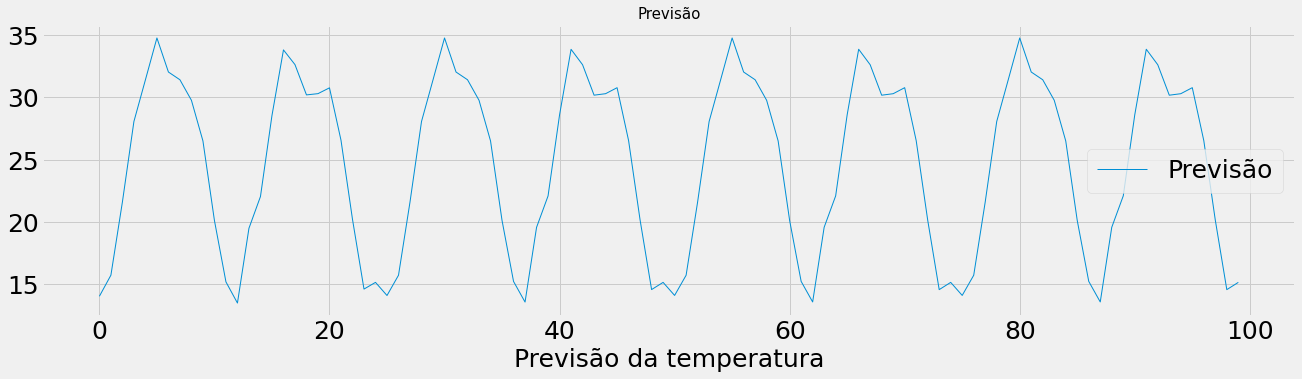

In [132]:
pd.concat([pred_1.Previsão],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend(["Previsão"])
plt.xlabel('Previsão da temperatura')
plt.title('Previsão',size=15)
plt.show();

# Model SARIMA

- SARIMA(2, 0, 2)x(2, 1, 0, 12) tem um desempenho melhor que outro modelo de ordens e tem baixo valor de AIC.
- Divida o conjunto de trem e o conjunto de teste do conjunto de dados de trem e ajuste nosso modelo.

# 6.7) Treino e Teste

- Treino e teste da base de dados da coluna temperatura

In [102]:
x = df[:-13] # Variável para treino
y = df[-13:] # Variável para teste

In [103]:
# Total de linhas e colunas dados variável x
x.shape

(36,)

In [104]:
# Total de linhas e colunas dados variável y
y.shape

(13,)

# Modelo SARIMA

In [137]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelo SARIMAX
# Ajuste o modelo SARIMAX ao conjunto de treino
modelo_sarimax = SARIMAX(x, order = (2,0, 2), seasonal_order = (2, 1, 0, 12))
modelo_sarimax_fit = modelo_sarimax.fit()
print(modelo_sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                   36
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                 -34.322
Date:                             Sun, 30 Jan 2022   AIC                             82.643
Time:                                     03:24:32   BIC                             90.890
Sample:                                 01-01-2013   HQIC                            84.831
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2621     11.447      0.110      0.912     -21.174      23.698
ar.L2         -0.9944     1

C:\Users\rafae\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



**Modelo SARIMAX**

- Prob(Q) é >0,05, então não rejeitamos a hipótese nula de que os resíduos não são correlacionados. Prob(JB) >0,05, então não rejeitamos a hipótese nula de que os resíduos não são normalmente distribuídos Assim, com base no resumo dado, os Resíduos não são correlacionados e normalmente distribuídos

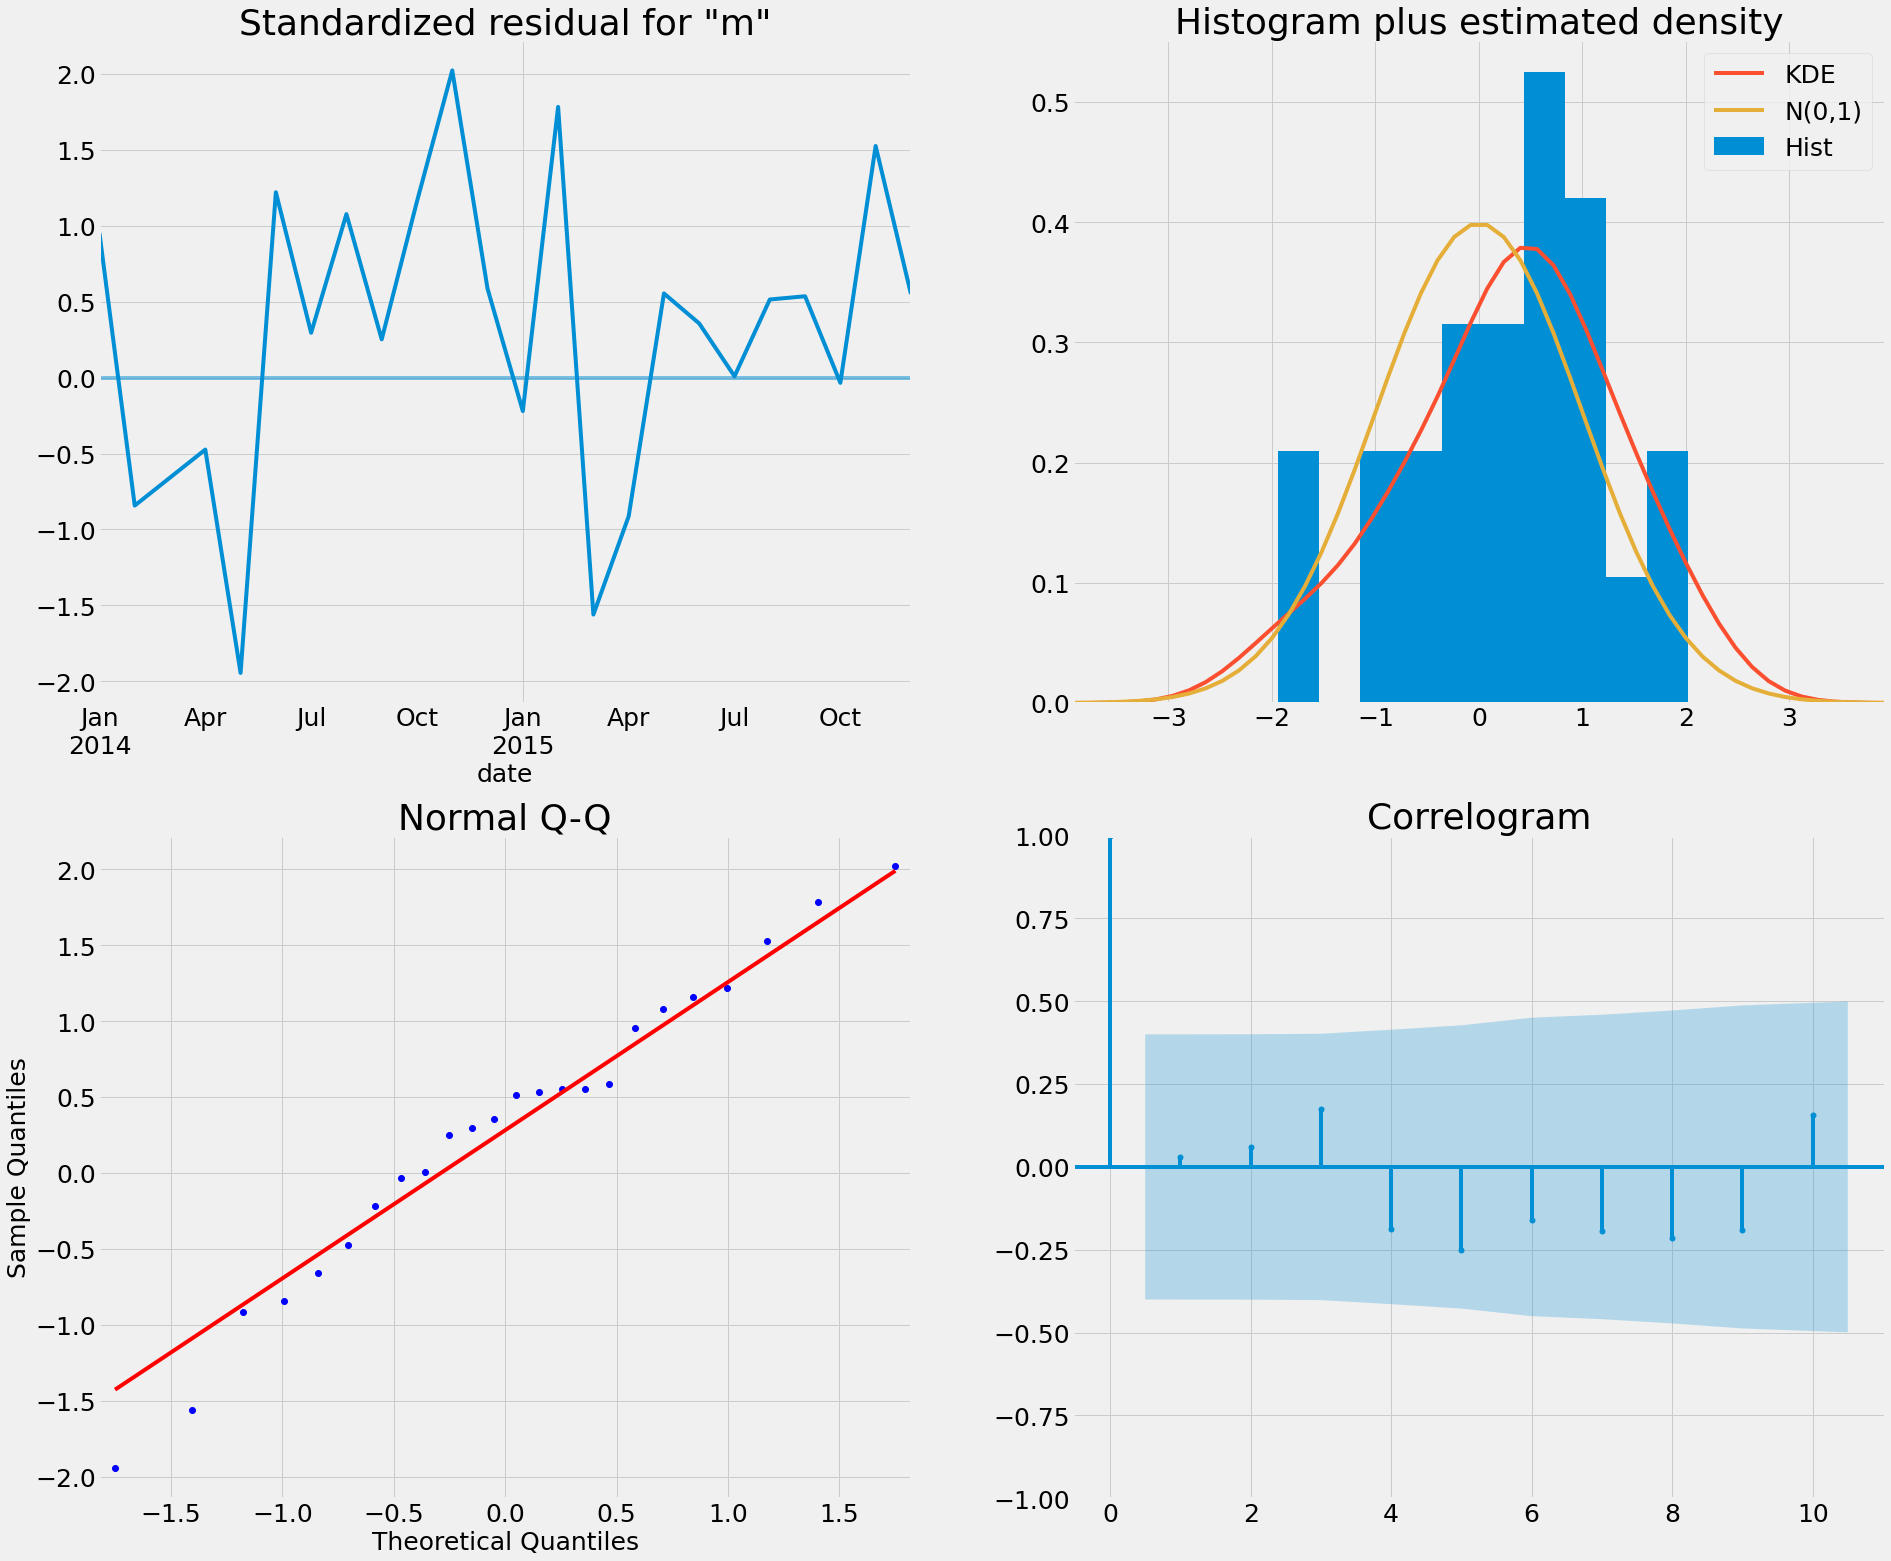

In [148]:
# 4 gráfico diagnóstico do modelo SARIMA
modelo_sarimax_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

**Standardized residul**

- O gráfico de resíduos padronizado informa que não há padrões óbvios nos resíduos A curva KDE é muito semelhante à distribuição normal. A maioria dos Datapoints está na linha reta. Além disso, correlações de 95% para atraso maior que um não são significativas Nosso modelo segue um comportamento padronizado. se não, temos que melhorar nosso modelo Prever os valores para o conjunto de teste

In [151]:
# Prever os valores para o conjunto de teste

x_1 = len(x)
y_2 = len(x) + len(y) - 1

pred = modelo_sarimax_fit.predict(start = x_1, end = y_2)
pred

2016-01-01    12.372102
2016-02-01    15.485185
2016-03-01    22.926974
2016-04-01    29.000255
2016-05-01    32.863580
2016-06-01    33.367473
2016-07-01    31.326515
2016-08-01    30.008395
2016-09-01    29.459601
2016-10-01    26.055190
2016-11-01    18.605779
2016-12-01    15.116174
2017-01-01    13.516815
Freq: MS, Name: predicted_mean, dtype: float64

In [152]:
# Previsão 

pred = modelo_sarimax_fit.predict(n_periods=100)
pred = pd.DataFrame(pred)
pred

predicted_mean
date                      
2013-01-01        0.000000
2013-02-01        0.000001
2013-03-01       -0.000002
2013-04-01       -0.000009
2013-05-01       -0.000017
2013-06-01       -0.000024
2013-07-01       -0.000028
2013-08-01       -0.000027
2013-09-01       -0.000021
2013-10-01       -0.000013
2013-11-01       -0.000008
2013-12-01       -0.000009
2014-01-01       12.074745
2014-02-01       16.944870
2014-03-01       22.516622
2014-04-01       28.703150
2014-05-01       33.995646
2014-06-01       33.155384
2014-07-01       31.643048
2014-08-01       29.992459
2014-09-01       29.433530
2014-10-01       24.997413
2014-11-01       17.499860
2014-12-01       14.069951
2015-01-01       12.883418
2015-02-01       17.393427
2015-03-01       22.763292
2015-04-01       28.713730
2015-05-01       32.926370
2015-06-01       32.468851
2015-07-01       30.402752
2015-08-01       29.947274
2015-09-01       30.265677
2015-10-01       26.888650
2015-11-01       19.707455
2015-12-01       14.629153

<AxesSubplot:title={'center':'Previsão modelo SARIMA - Temperatura'}, xlabel='Temperatura previsão'>

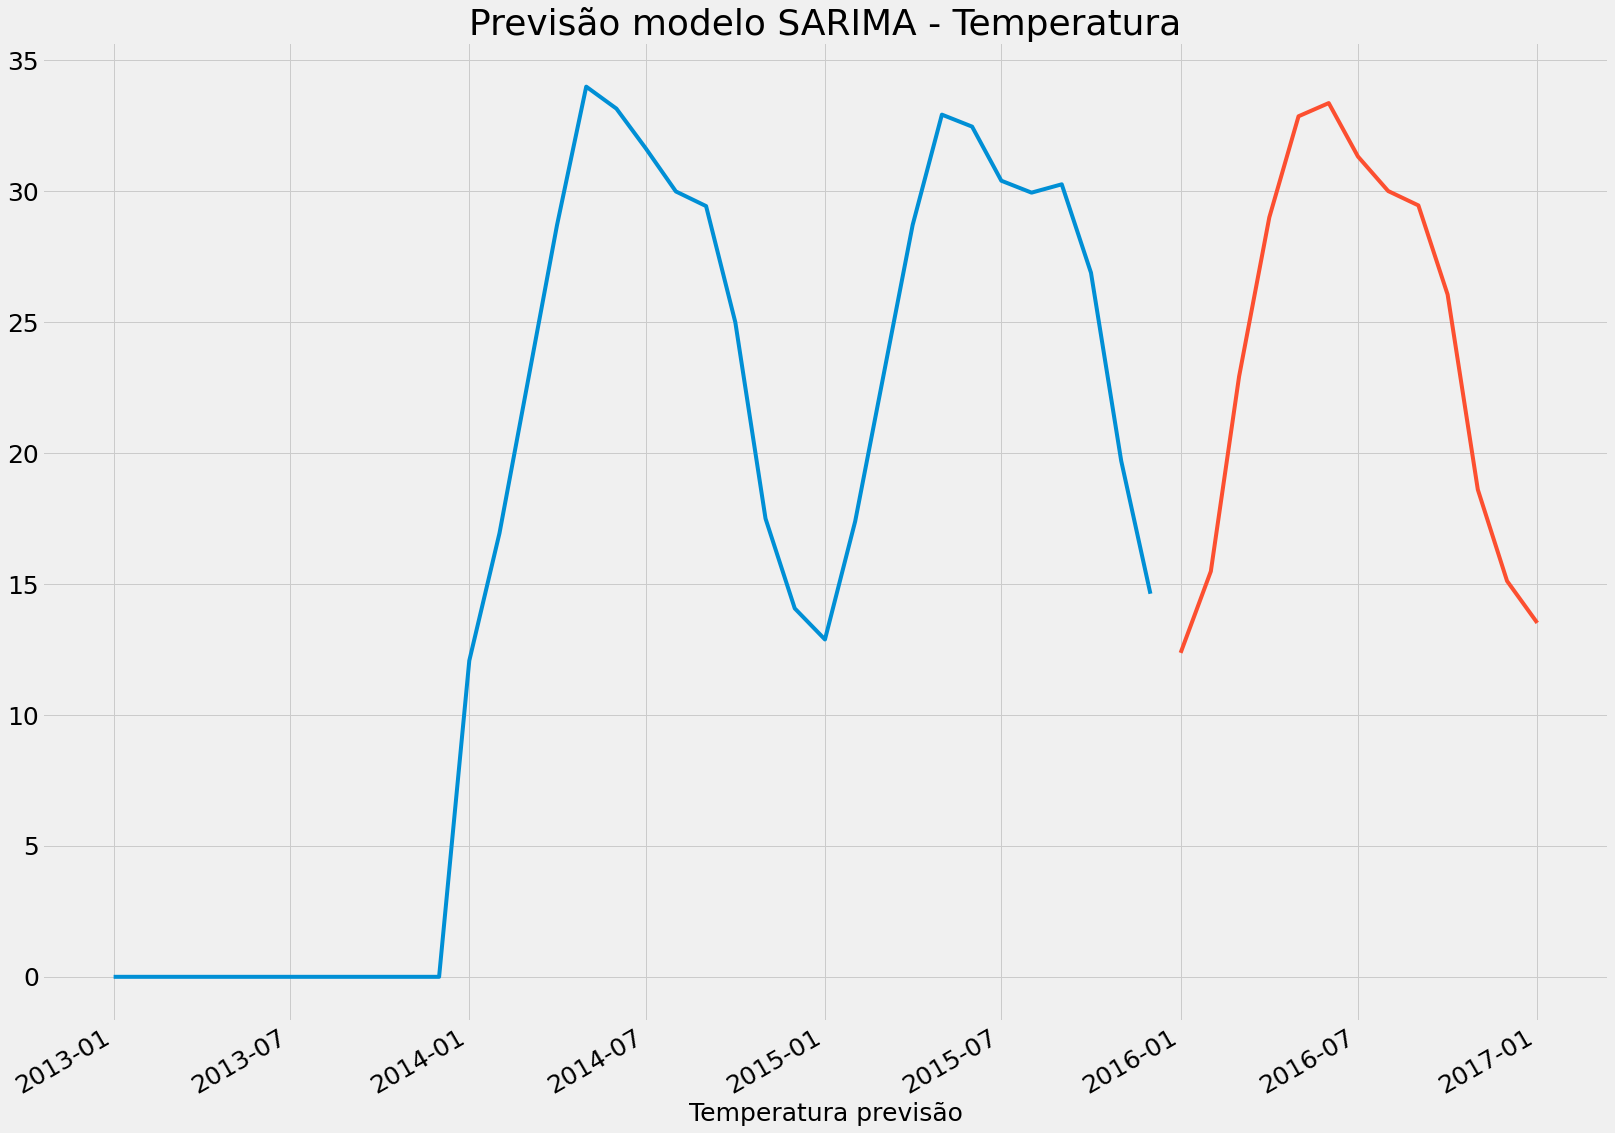

In [189]:
plt.plot(pred["predicted_mean"])
plt.title("Previsão modelo SARIMA - Temperatura")
plt.xlabel("Temperatura previsão")
predictions.plot(label='Previsão')


# Métricas para o modelo

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [182]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(x, pred))
mae = mean_absolute_error(x, pred)
mape = mean_absolute_percentage_error(x, pred)
mse = mean_squared_error(x, pred)
r2 = r2_score(x, pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE   14.892123
MAE     8.855737
MSE   221.775338
MAPE    0.360248
R²     -3.511511

# Modelo 02 - Dados test- Daily Delhi Climate Test

In [241]:
data_test = pd.read_csv('Bases de dados\DailyDelhiClimatetest.csv', index_col='date', parse_dates=True)
data_test.head()

meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [242]:
data_test.tail()

meantemp   humidity  wind_speed  meanpressure
date                                                     
2017-04-20    34.500  27.500000    5.562500    998.625000
2017-04-21    34.250  39.375000    6.962500    999.875000
2017-04-22    32.900  40.900000    8.890000   1001.600000
2017-04-23    32.875  27.500000    9.962500   1002.125000
2017-04-24    32.000  27.142857   12.157143   1004.142857

In [243]:
data_test.shape

(114, 4)

In [244]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


In [245]:
data_test_md = data_test['meantemp'].resample('MS').mean().dropna()
data_test_md

date
2017-01-01    15.710873
2017-02-01    18.349981
2017-03-01    23.753760
2017-04-01    30.753663
Freq: MS, Name: meantemp, dtype: float64

In [246]:
# Modelo SARIMAX dados test

modelo_sarima_2 = SARIMAX(df, order=(2,0,2), seasonal_order=(2,1,0,12))
modelo_sarima_2_fit = modelo_sarima_2.fit()
print(modelo_sarima_2_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                   49
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                 -67.034
Date:                             Sun, 30 Jan 2022   AIC                            148.067
Time:                                     04:00:50   BIC                            159.344
Sample:                                 01-01-2013   HQIC                           152.043
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8779      0.222      3.955      0.000       0.443       1.313
ar.L2         -0.6574      

C:\Users\rafae\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



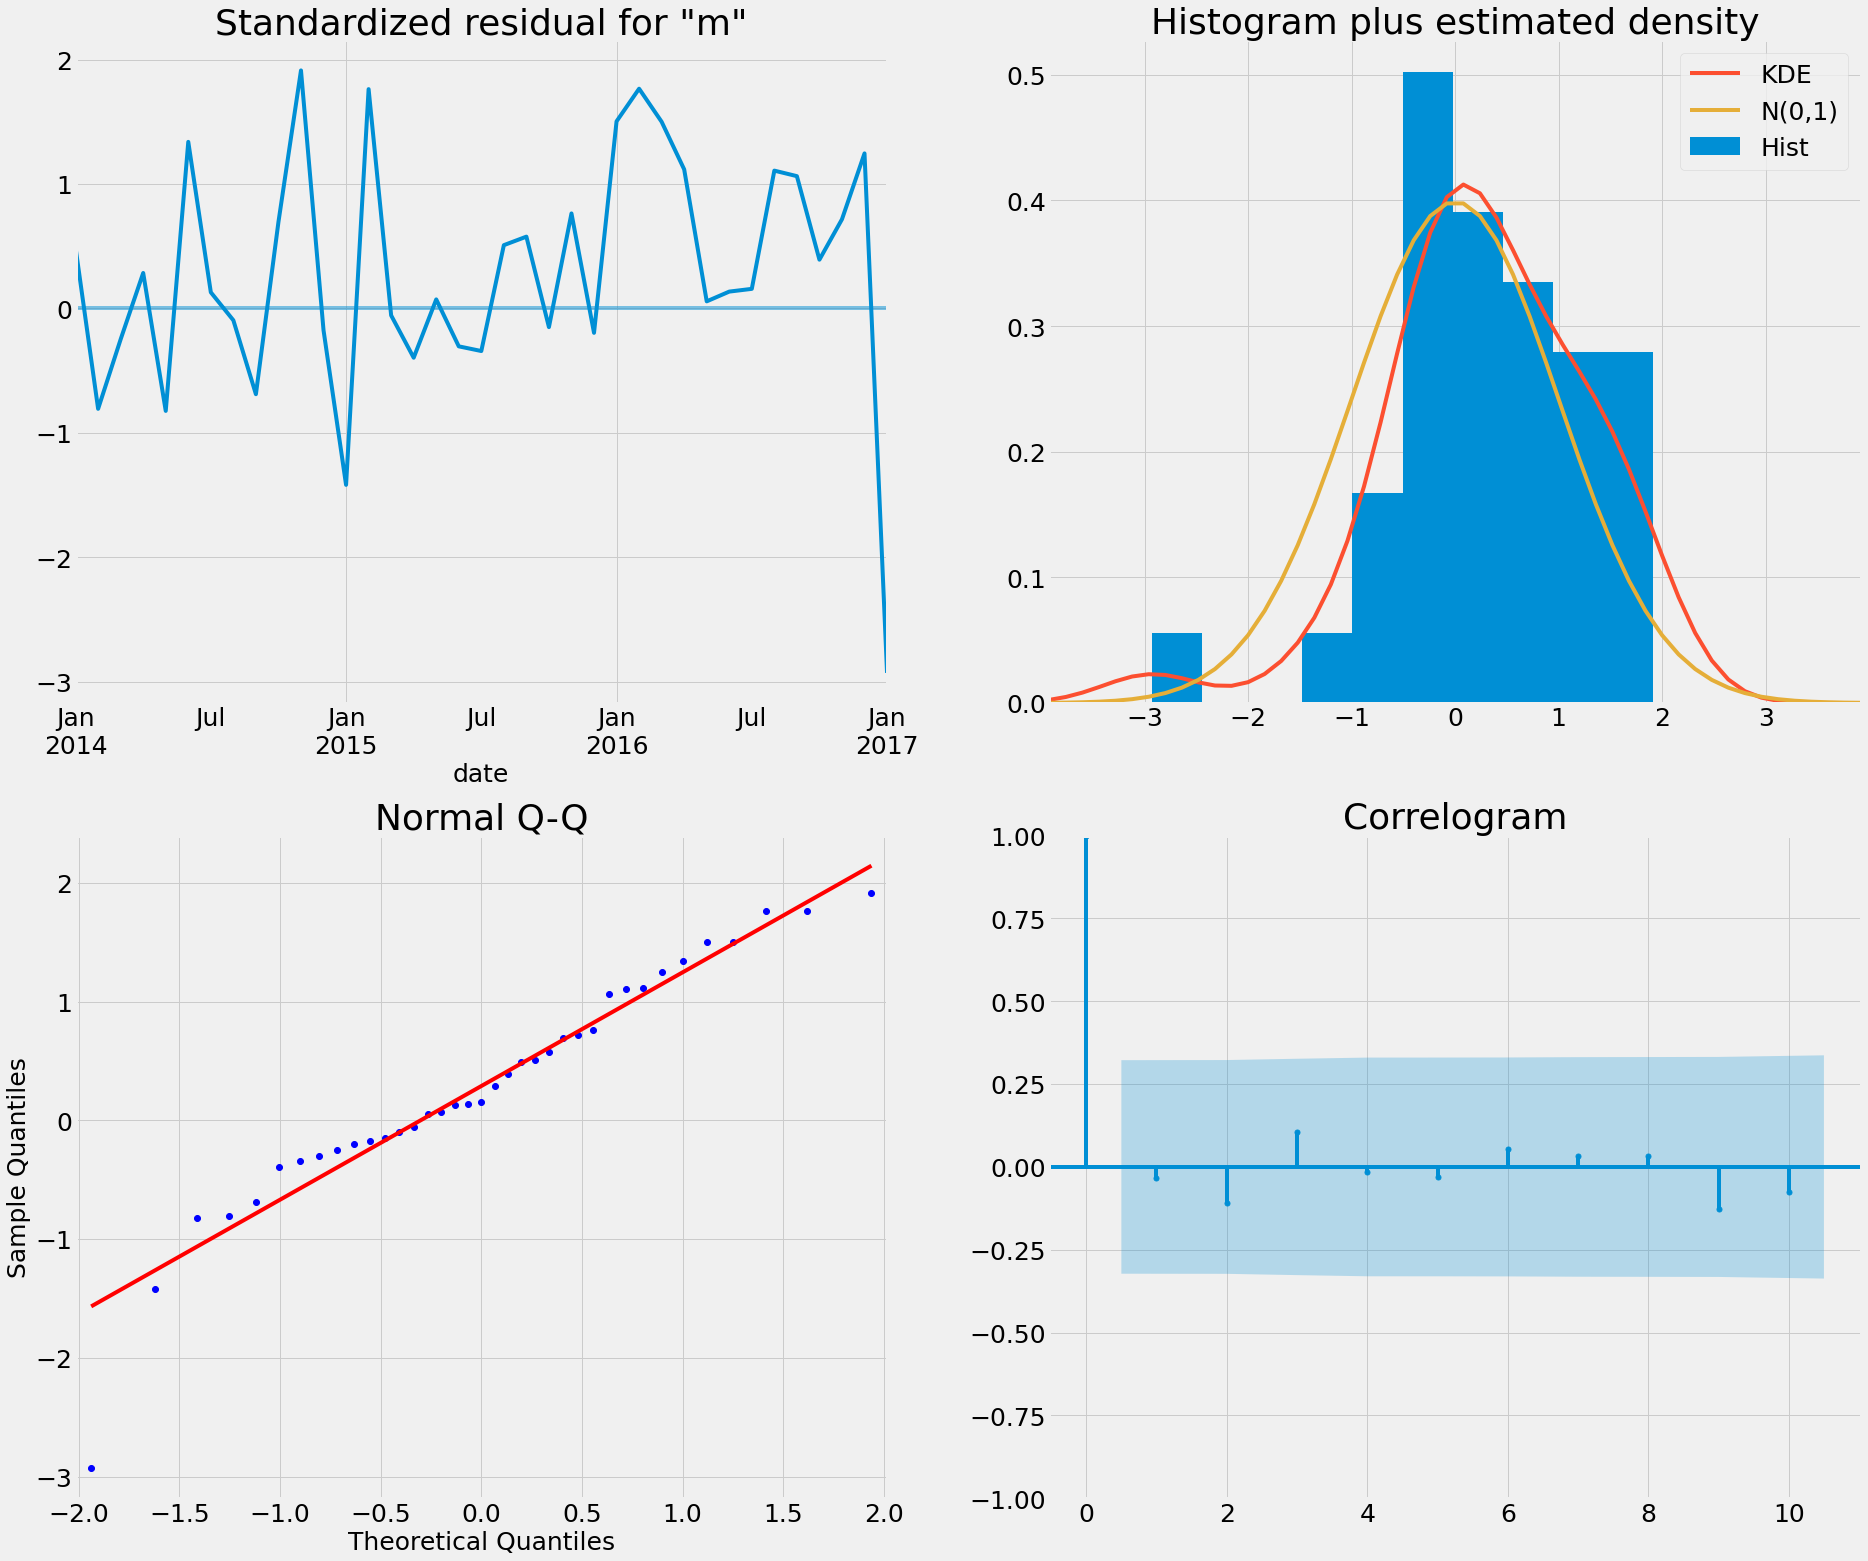

In [247]:
# 4 gráfico diagnóstico do modelo SARIMA

modelo_sarima_2_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

In [248]:
# Exibindo os ultimos dados 
data_test_md.tail()

date
2017-01-01    15.710873
2017-02-01    18.349981
2017-03-01    23.753760
2017-04-01    30.753663
Freq: MS, Name: meantemp, dtype: float64

In [249]:
# Index dos dados
data_test_md.index[0]

Timestamp('2017-01-01 00:00:00', freq='MS')

In [250]:
x_1 = data_test_md.index[0]
y_1 = data_test_md.index[-1]

pred_1 = results_1.predict(start=x_1, end=y_1)
pred_1

2017-01-01    13.661374
2017-02-01    16.548018
2017-03-01    19.074834
2017-04-01    26.886269
Freq: MS, Name: predicted_mean, dtype: float64

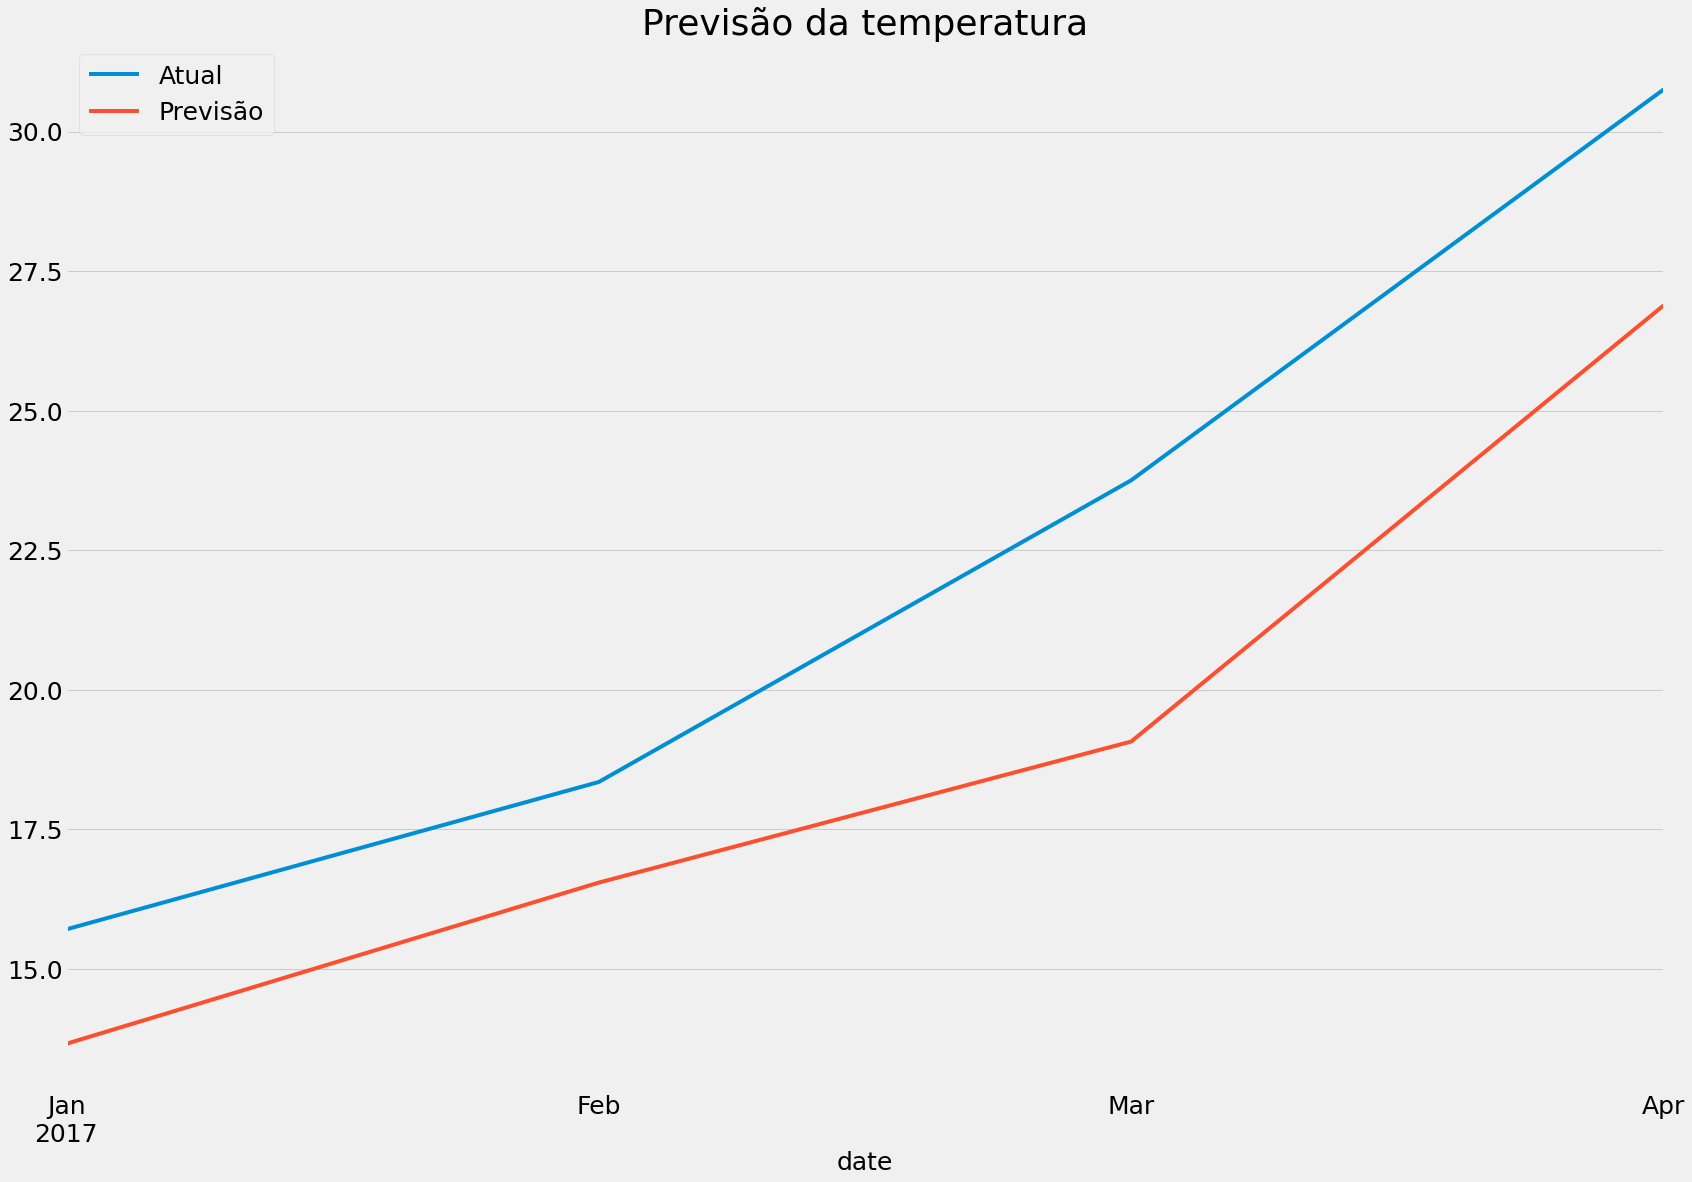

In [251]:
# Gráfico da previsão da temperatura
data_test_md.plot(legend=True,figsize=(25.5, 18))
pred_1.plot()
plt.title("Previsão da temperatura")
plt.legend(["Atual", "Previsão"])
plt.show()

In [252]:
# Create SARIMA mean forecast
sarima_forecast = results_1.get_forecast(steps=20).predicted_mean
sarima_forecast

2017-02-01    16.548018
2017-03-01    19.074834
2017-04-01    26.886269
2017-05-01    33.506691
2017-06-01    34.890743
2017-07-01    31.785958
2017-08-01    30.523544
2017-09-01    29.754731
2017-10-01    26.389979
2017-11-01    20.767132
2017-12-01    15.526269
2018-01-01    14.423801
2018-02-01    18.806865
2018-03-01    23.936173
2018-04-01    30.756944
2018-05-01    34.236764
2018-06-01    34.459562
2018-07-01    30.928783
2018-08-01    30.902586
2018-09-01    31.094552
Freq: MS, Name: predicted_mean, dtype: float64

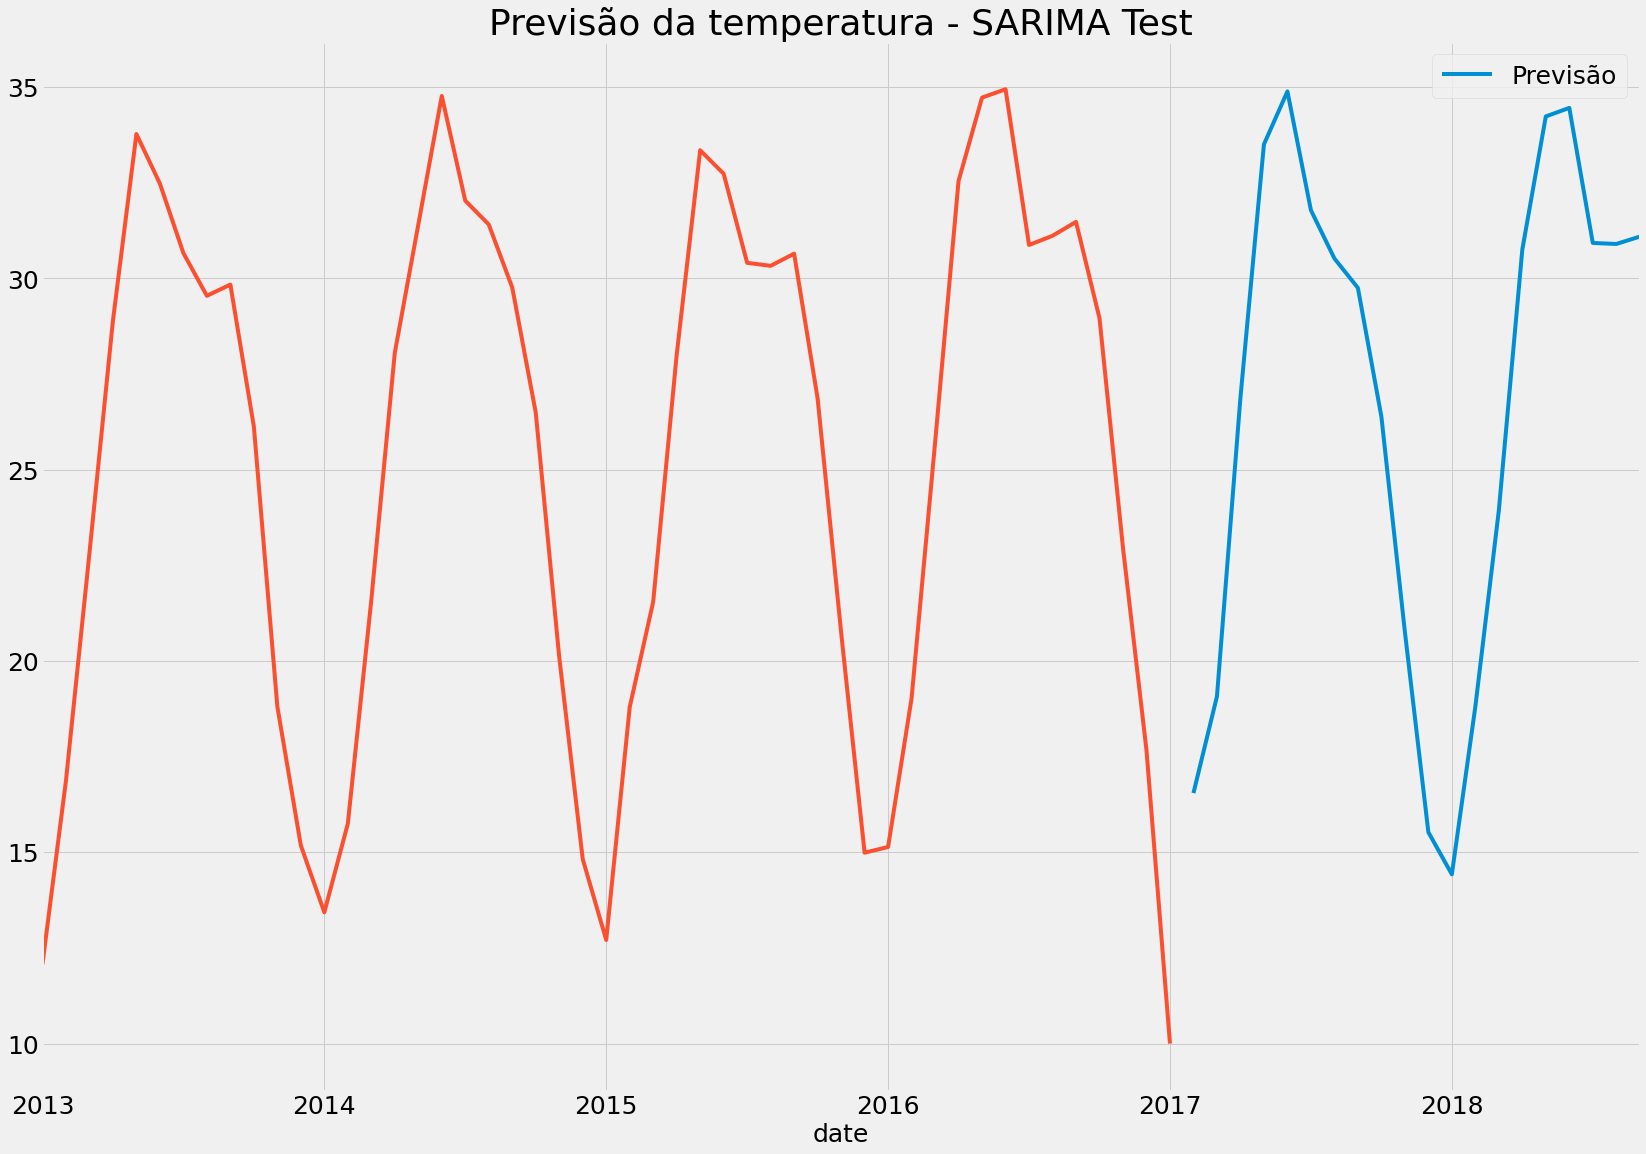

In [253]:
sarima_forecast.plot(label='SARIMAX',figsize=(25.5, 18), legend=True)
test_monthly.plot()
plt.title("Previsão da temperatura - SARIMA Test")
plt.legend(["Previsão"])
plt.show()

# Métricas do modelo 02 - Dados de test

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [254]:
rmse = np.sqrt(mean_squared_error(test_monthly, predictions_1))
mae = mean_absolute_error(test_monthly, predictions_1)
mape = mean_absolute_percentage_error(test_monthly, predictions_1)
mse = mean_squared_error(test_monthly, predictions_1)
r2 = r2_score(test_monthly, predictions_1)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE   12.800367
MAE     6.899652
MSE   163.849400
MAPE    0.287592
R²     -2.130089

In [255]:
# Salvando modelo

import pickle

with open('pred.pkl', 'wb') as file:
    pickle.dump(pred, file)
    
with open('# modelo_arima_auto_pred_1', 'wb') as file:
    pickle.dump(modelo_arima_auto_pred_1, file)
    
with open('pred.pkl', 'wb') as file:
    pickle.dump(pred, file)

# Conclusão do modelo machine learning

Nesse modelo foi feito dois modelos ARIMA, SARIMA com os dados de treino, teste, modelo teve uma previsão das temperaturas podemos observar a previsão de 2013 ate 2017 nível de temperatura está subindo o nível de Co2. Pela análise a temperatura devido efeito estufa. A conclusão é a temperatura em 4 anos vai subir mais ainda.